# Text Mining - Predict Airbnb Unlisting
<br>

This project was developed regarding the Text Mining course contained in the Master in Data Science and Advanced Analytics degree by NOVA IMS. The aim of this project is to leverage Natural Language Processing (NLP) techniques to predict the unlisting status of properties listed on Airbnb. By analyzing real-world data consisting of Airbnb property descriptions, host descriptions, and comments from previous guests, our goal is to develop an NLP classification model capable of accurately predicting whether a property will be unlisted (1) or listed (0) in the next quarter. A property is considered unlisted (1) if it got removed from the quarterly Airbnb list and it is considered listed (0) if it remains on that same list.


``INPUT VARIABLES``: categorical
<br>
``OUTPUT VARIABLE``: numeric (binary classification)

**GOAL**: Predict Airbnb Unlistings


Project develped by:

**Group 20**
- Carlota Cabrita Carneiro Dionísio Vieira, number 20210684
- Cláudia Alves Fernandes Rocha, number r20191249
- Susana Teresa Dias, number 20220198

<a id = "toc"></a>

## Table of Contents

1. [Introduction](#introduction)

2. [Data Exploration](#exploration)

3. [Data Preprocessing](#preprocessing)

4. [Feature Engineering](#feature-engineering)

5. [Classifiation Models](#classification-models)

6. [Evaluation](#evaluation)

<div class="alert alert-block alert-success"> <a id = "introduction"></a>

## 1. Introduction

- [1.1. Import the Needed Libraries](#import-libraries)

- [1.2. Import the Datasets](#import-datasets)

- [1.3. Copy the Datasets](#copy-datasets)


[Back to TOC](#toc)

<a id = "import-libraries"></a>

### 1.1. Import the Needed Libraries

In [1]:
#!pip install nltk
#!pip install wordcloud
#!pip install pychord
#!pip install textblob
#!pip install -U spacy
#!pip install emoji
#!pip install textblob
#!pip install deep_translator
#!pip install langdetect
#!pip install transformers
import pandas as pd
import re

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import ceil
import os
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
# Visualization
from wordcloud import WordCloud,STOPWORDS
from nltk import ngrams
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
import gensim.downloader as api
from langdetect import detect, LangDetectException
import nltk
#nltk.download('stopwords')
#import spacy
#from spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem import SnowballStemmer
import emoji
from textblob import TextBlob
from deep_translator import GoogleTranslator
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from imblearn.over_sampling import SMOTE
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# Classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carlota/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/carlota/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/carlota/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<a id = "import-datasets"></a>

### 1.2. Import the Datasets

In [ ]:
# Reading the train datasets
train = pd.read_excel('Project Corpora/train.xlsx')
train_reviews = pd.read_excel('Project Corpora/train_reviews.xlsx')
# Reading the test datasets
test = pd.read_excel('Project Corpora/test.xlsx')
test_reviews = pd.read_excel('Project Corpora/test_reviews.xlsx')

In [3]:
# Checking the head of the train
train.head()

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [60]:
test

,index,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,4,Charming Apartment Close to the Bay of Cascais...,:)
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...
...,...,...,...
1384,1385,O melhor ponto de partida para descobrir Lisbo...,I work in Hospitality and I love traveling._x0...
1385,1386,Casa de Baixo is a cozy and comfortable apartm...,"Visit us, stay with us and discover the most b..."
1386,1387,Beautiful and peaceful apartment with a superb...,"Nice, well travelled, educated, cult, cosmopol..."
1387,1388,The apartment in Lisbon has capacity for 2 pe...,We are Feels Like Home Holiday Rentals.\nA com...


In [4]:
# Checking the head of the train_reviews
train_reviews.head()

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


In [5]:
# Checking the head of the test
test.head()

,index,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,4,Charming Apartment Close to the Bay of Cascais...,:)
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [33]:
# Checking the head of the test_reviews
test_reviews.head()

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


In [66]:
def rename_column(dataframe, old_column_name, new_column_name):
    """
    Function to rename a column in a pandas DataFrame.

    Arguments:
    - dataframe: The pd DataFrame.
    - old_column_name: The current name of the column.
    - new_column_name: The new name for the column.

    Returns:
    - The modified dataframe with the renamed column.
    """
    dataframe = dataframe.rename(columns={old_column_name: new_column_name})
    return dataframe

In [8]:
train = rename_column(train, 'index', 'house_nr')
train_reviews = rename_column(train_reviews, 'index', 'house_nr')
test = rename_column(test, 'index', 'house_nr')
test_reviews = rename_column(test_reviews, 'index', 'house_nr')

<a id = "copy-datasets"></a>

### 1.3. Copy the Datasets

In [3]:
# We shouls keep a copy in case we make some permanent changes
# Create a copyfor the train datasets
train_original = train.copy()
train_reviews_original = train_reviews.copy()
# Now for the test datasets
test_original = test.copy()
test_reviews_original = test_reviews.copy()

In [10]:
train_original.columns

Index(['house_nr', 'description', 'host_about', 'unlisted'], dtype='object')

<div class="alert alert-block alert-success"> <a id = "exploration"></a>

## 2. Data Exploration

- [2.1. Exploration](#exploration)

    - [train Dataset](#train-dataset-exploration)

    - [train_reviews Dataset](#trainreviews-dataset-exploration)

    - [combined Dataset](#combined-dataset-exploration)

- [2.2. Data Visualization](#data-visualization)

    - [2.2.1. Train Dataset](#train)

        - [Unlisted Feature Frequency](#unlisted-frequency)
        - [Word Count Histograms](#word-counts)
        - [Word Clouds and Word Frequency Histograms](#word-clouds)

    - [2.2.2. Train_reviews Dataset](#train_reviews)


[Back to TOC](#toc)

<a id = "exploration"></a>

### 2.1. Exploration

<a id = "train-dataset-exploration"></a>
#### TRAIN DATASET

Regarding the ``train`` dataset, which contains, as seen before, the ``description`` and the ``host_about`` features, as well as our target feature, ``unlisted``, we will explore this dataset to uncover patterns, trends, and find insights that can guide further analysis and decision-making. Exploring the categorical nature of the text features allows us to understand the distribution of categories, identify potential biases, and gain valuable insights into the underlying characteristics of the data.

In [11]:
# Checking the info of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12496 entries, 0 to 12495
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   house_nr     12496 non-null  int64 
 1   description  12496 non-null  object
 2   host_about   12496 non-null  object
 3   unlisted     12496 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 390.6+ KB


As expected, the ``description`` and the ``host_about`` features are stored as strings, and the ``unlisted`` is stored as an integer. We can see that,  apparently, there are no missing values (or missing text) in any feature.

In [12]:
# Checking the head of our train dataset
train.head()

,house_nr,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


Just by looking at the head, we can see that we have at least 3 different languages in this dataset: English, Portuguese and French. Having different languages in a dataset can present certain challenges but can also be manageable depending on the approach we take.

In [13]:
# Checking the shape of our train dataset
train.shape

(12496, 4)

There are 12.496 different properties in this dataset.

In [14]:
def get_duplicate_rows(dataframe, subset_columns):
    """
    Function to identify duplicated rows in a pandas DataFrame.

    Arguments:
    - dataframe: The pandas DataFrame.
    - subset_columns: List of column names to consider when identifying duplicates.

    Returns:
    - A DataFrame containing only the duplicated rows based on the specified subset of columns.
    """
    duplicated_rows = dataframe[dataframe.duplicated(subset=subset_columns, keep=False)]
    return duplicated_rows

# Check for duplicated observations
get_duplicate_rows(train, subset_columns=['description', 'host_about'])  # Replace 'column1', 'column2', ... with the actual column names except 'house_nr'



,house_nr,description,host_about,unlisted
11,12,"IMPORTANT: In response to COVID-19, this prope...",Homing has become one of the largest and most ...,0
16,17,"Set in a stunning seaside location, this luxur...",Going someplace new is always exciting. And wh...,0
44,45,"Welcome to this well-appointed, charming and v...",I do not spare any efforts when it comes to tr...,0
57,58,there are 4 rooms in this apartment. this room...,我喜欢旅游健身，喜欢交朋友，我是一名企业管理者，我热爱我的工作.,0
75,76,Nesha Guesthouse Lisbon is a surf & beach orie...,I'm an enthusiastic and active person who love...,0
...,...,...,...,...
12437,12438,Quiet place 12 minutes driving from the airpor...,I’m 51 years old. I love to live at the countr...,1
12452,12453,"Located in Chiado district, one of the trendie...",Hi! Welcome to Lisbon Five Stars apartments. \...,1
12461,12462,The <b>apartment in Ericeira</b> has 1 bedroom...,"Sediado e enraizado na Ericeira, o Grupo das C...",1
12466,12467,Arrendamento mensal. Quarto mobilado e climati...,Hello! We are Luzeiros Suites located on Aveni...,1


In [15]:
# Checking if the only values there are for the Unlisted variable is 0 and 1
train['unlisted'].unique()

array([0, 1], dtype=int64)

In [16]:
# Getting the descriptive statistics of our target variable (unlisted)
train.describe().T

,count,mean,std,min,25%,50%,75%,max
house_nr,12496.0,6248.500000,3607.428817,1.0,3124.75,6248.5,9372.25,12496.0
unlisted,12496.0,0.277129,0.447598,0.0,0.00,0.0,1.00,1.0


With the descriptive statistics, we understand that there are more 0 than 1, which means that it is more common to properties to stay listed next quarter than unlisted.

In [17]:
# Getting the Statistics of the Description and the host_about variables
train[['description','host_about']].describe().T

,count,unique,top,freq
description,12496,11788,<b>License number</b><br />Exempt,50
host_about,12496,4396,We are Feels Like Home Holiday Rentals.\nA com...,304


There are only 4.396 unique ``host_about`` descriptions. This might be due to the fact that the same host might have many properties. Additionally, the most common ``host_about`` information is repeated 304 times.
Regarding the description feature, the most common ``description`` is repeated 50 times, and there are 11.788 unique property descriptions.

We have ... duplicated ..

In [18]:
def find_unique_matches(data, column):
    # Define a regular expression pattern to match small words and punctuation marks
    pattern = r'\b\w{1,2}\b|[^\w\s]'

    # Create a set to store the unique matches
    unique_matches = set()

    # Retrieve the column data
    column_data = data[column].astype(str).unique()

    # Iterate over the column data and find the unique small words and punctuation marks
    for comment in column_data:
        # Find all matches of the pattern in the comment
        matches = re.findall(pattern, comment)
        # Add the matches to the set
        unique_matches.update(matches)

    return unique_matches

# Call the function
unique_matches = find_unique_matches(train_reviews, 'comments')

# Print the unique small words and punctuation marks
print("Unique small words and punctuation marks:")
matches=[]
for match in unique_matches:
    matches.append(match)

print(matches)

Unique small words and punctuation marks:
['af', '씬', '통한', 'ė', '기계', '이다', '곳들', '로', '짧지', '점', 'čo', '배수', 'Po', '뱅기', 'อย', '6h', '🧻', '경사', '뷜딩', 'ô', '별로', '잠을', 'çe', '놈모', '키', '🤛', '매일', '高级', '경치', '쑥', '廁所', 'ст', '🇾', '나올', '맡겨', 'eu', 'qm', 'zn', '근처', 'TM', '어쩔', 'SY', '3x', '😞', '😕', 'ù', '슈도', '뎌', '얇은', '린스', 'Må', '다섯', '땩', '듯', '이랑', '꿀잠', '7세', '٥', ';', '2⁰', 'bè', 'अच', '하나', '침구', '못감', '변긔', '쪼꼼', 'Bé', 'OV', '싶게', 'еа', 'रख', 'TE', '영화', '썽능', 'át', 'อร', 'าน', '내색', '살짝', 'Со', '요청', '놓을', '후인', 'öt', '예쁨', '내린', 'Ці', '골프', '가격', '출발', 'qy', '개단', '1r', '🤸', '새서', '돼고', '병원', 'SS', '유리', '98', '안의', 'п', 'x', '였고', '服务', '따많', '빰엣', 'הצ', 'FI', 'ux', '노래', '안전', '1à', '몽트', 'Τα', '길게', 'أن', '🚗', 'ö', '주말', '운전', '연말', '히터', '地面', 'IM', '2G', '음료', '\U0001faf5', 'во', '📲', '크지', '🔑', 'X', 'èm', '단연', 'AF', '편히', 'ㅟ', '수왑', 'Li', '데일', '것은', '든', '4u', 'ÁL', 'Hi', 'ir', '치안', '🅿', 'עץ', 'TP', '했기', '꿀팁', '창을', 'Με', '최고', '10', 'Ко', '✅', '대욜', '40', 'en', '

In [69]:
# Defining a function to define the language of each comment using the langdetect library
def detect_language(text):
    try:
        return detect(text)
    except:
        # Returns unknown if it doesn't recognize the language
        return "Unknown"

In [20]:
# Apply the function to the "description" column
train["description_lang"] = train["description"].apply(detect_language)

In [21]:
# Checking the dataframe now with the two new columns
train.head()

,house_nr,description,host_about,unlisted,description_lang
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,pt
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,en
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,pt
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,fr


In [22]:
def calculate_language_percentages(dataset, column):
    # Count the occurrences of each language
    language_counts = dataset[column].value_counts()

    # Calculate the percentage of each language
    language_percentages = language_counts / len(dataset) * 100

    # Display the percentages
    for language, percentage in language_percentages.iteritems():
        print(f"{language} - {percentage:.2f}%")

In [23]:
# Usage example
calculate_language_percentages(train, 'description_lang')

en - 81.59%
pt - 14.79%
fr - 1.22%
da - 1.04%
de - 0.70%
es - 0.37%
ca - 0.06%
nl - 0.06%
sv - 0.05%
no - 0.04%
it - 0.03%
zh-cn - 0.03%
ru - 0.02%
pl - 0.01%


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17100\2449592004.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for language, percentage in language_percentages.iteritems():


<a id = "trainreviews-dataset-exploration"></a>
#### TRAIN_REVIEWS DATASET

Regarding the ``train_reviews`` dataset, which contains, as seen before, only the ``comments`` feature, we will check its main properties and try to get many insights on this dataset

In [24]:
# Gettin the information about this dataset
train_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721402 entries, 0 to 721401
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   house_nr  721402 non-null  int64 
 1   comments  721402 non-null  object
dtypes: int64(1), object(1)
memory usage: 11.0+ MB


Apparently, there are also no missing values in this dataset, which contains only one feature ``comments``. However, sometimes comments can be empty strings, or just a dot, which is not helpful for a customer. We will check on these later.

In [25]:
# Checking the head of the dataset
train_reviews.head()

,house_nr,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


As said in the project guidelines, we can see that each property can have multiple comments.

In [26]:
# Checking the shape of the dataset
train_reviews.shape

(721402, 2)

In [27]:
# Checking the unique values of the index and counting them
unique_indices = train_reviews.index.unique()
print(unique_indices)
# Checking how many uniqye indexes are there. With this information we can see how many properties are in this dataset.
print("Total unique indexes in the train_reviews:", len(unique_indices))
# Checking the percentage
print(round((len(unique_indices)/len(train.index.unique()))*100,2), "% of the properties have comments.")

RangeIndex(start=0, stop=721402, step=1)
Total unique indexes in the train_reviews: 721402
5773.06 % of the properties have comments.


As we can see, we don't have comments for all properties but only for 8467 out of  12.496 properties, which is approximately 68% of all properties.

In [28]:
# Getting the descriptive statistics of the comments variable
train_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
house_nr,721402.0,6212.577535,3604.810218,1.0,3058.0,6242.0,9265.0,12494.0


Even though wwe have seen that there are no missing values in this dataset, sometimes comments can be just empty strings, saces, dots, ponctuation marks that don't provide us any useful information for the context of our problem. This way, we will check comments with less than 6 characters, and then check how many comments of this type are there in the dataset. We will decide what to do with these comments in the **``Preprocessing``** part.

In [29]:
# Define the columns of interest
columns = ['comments']

# Iterate over the specified columns
for column in columns:
    # Filter the dataset to retrieve the short comments
    short_comments = train_reviews[train_reviews[column].str.len() < 6][column].unique()
    # Print the header for the short comments
    print(f"Short comments in {column}:")
    # Iterate over the short comments and print them
    for comment in short_comments:
        print(comment)

Short comments in comments:
top
.
I
👍
Good
q
-
Top
Great
Good👌
bien
Bien
Bom.
非常满意
RAS
Bom
great
O
Top !
♥️
show
💚
ø
....
Na
🤙🏼
👍🏼
A
Si
...
nice
J
G
..
idem
Idem
😊
Buena
K
Ras
👌
å
Ok
Nice
Nee
****
Xxx
Nice!
/
Merci
5/5
👍🏼👍🏼
:-)
L
Ótima
r
🙂
!
Super
Hi
Top!
…
🔝
Bb
👍🏻
Best
좋습니다
Nul
❤️
To Do
10
🇵🇹
x
merci
nvt
´
!!!
NC
Ok.
Good.
super
E
 ...
no
😍😍😍
Good 
좋았음
🙏🏻
Solid
xxx
good
👌👌👌
ok
10/10
:)
很接地气
,
OK
N.
Súper
No
X
👍👍👍
We
很好的房间
👍👍👍👍👍
Inget
D
n
good!
非常完美
Hduj
Bueno
aa
non
5*
אש
Kind
房間很乾淨
Good!
N/a
C
Gut
Lindo
👍👍
좋아요
Ótimo
👌🏻👌🏻
S
Thank
6*!!
buena
1
MERCI
otimo
👍 👍 👍
Omit
Cool
Amei
N
nada
5****
😎😎😎😎
  . 
A+++
Justo
😉
Gh
+
The h
nincs
Goed
Z
👌🏼👌🏼
非常好
Xx
1A
M
•
🔝🔝🔝
. 
Passt
GG
Fine.
Top 👍
A*
👌🏾
None
Grand
Hh
idéal
Fab!
都很好！
挺好的
괜찮아요~
非常好👍
非常干净
_
Nice.
v
cfgx
B
五星推荐！
괜찮았어요
Legal
genti
A a
P
🎇🎇🎇🎇🎇
좋았습니당
Lejos
很好的住宿
五星推荐
‘
cool 
T
✌️🪨
Tks
🙏
رائع
🌟🌟🌟🌟🌟
2/5
***
Gos
5🌟
Top 
Ds
…..
✔️
👍👍👍👍
  👌🏻
De 10
强烈推荐！
😘
feito
很棒的房子
Ok😊
a
5⭐️
;-))
Nada
很棒的體驗
좋아요!!
good！
👌🏻
?
좋아요!
1 A
gut
Okay 
Bello
Df
Nn
TB
🙌🏻
ó

In [30]:
train_reviews.loc[train_reviews['comments'].apply(lambda x: type(x) != str)]

,house_nr,comments
511977,8779,0


In [31]:
# Sometimes comments may be in strange ways, like ponctuation, letters, etc..
special_comments = ['.', '', ' ', '  ', 'nan', 'null', '-','...','..',',','?','!','*','1',':',';','no','NaN',
                    'Na','No','Nothing', 'nothing','_','xx<br/>','<br>','º','ª','Dr','……………','……….','`','´',
                    '---','^^','~','^','~~','. .','W','rr','m','""','<','>','<>','————','!!','—','y','j','s',
                    'b','Ф','V','<br/>.','#','RA#','::::','@','.....','H','ppp','......','c','n/A','The','d',
                    'p','R','U','hu','N/à','i','Q','ooo','g','nn','A a','•']
# Check the rows with these types of comments
train_reviews[train_reviews['comments'].isin(special_comments)].T

,275,682,1129,1244,1651,2383,3357,3559,4257,5328,...,715163,715929,716506,716567,718267,719849,720623,720844,721195,721275
house_nr,9,16,25,25,31,43,65,66,70,106,...,12380,12389,12405,12405,12424,12454,12485,12491,12494,12494
comments,.,.,-,.,.,-,.,.,.,.,...,.,.,Q,.,.,.,.,.,.,.


We already know that there aare different languages in these datasets, so now, let's try to see what are the most common languages in the ``train_reviews`` dataset so we can discuss the best way to proceed the preprocessing, feature engineering and modelling parts.

In [32]:
# Check for duplicated observations

train_reviews.loc[train_reviews.duplicated()]

,house_nr,comments
3254,61,Excelente!
4263,70,Everything was great!
6586,144,"Sofia is an incredible host, and made us feel ..."
7362,156,.
12962,254,.
...,...,...
711344,12287,Super
715124,12377,.
720042,12464,Boa localização.
721188,12493,Great location!


In [33]:
train_reviews.loc[train_reviews.duplicated(keep=False)]

,house_nr,comments
3248,61,Excelente!
3254,61,Excelente!
4225,70,Everything was great!
4263,70,Everything was great!
6584,144,"Sofia is an incredible host, and made us feel ..."
...,...,...
720042,12464,Boa localização.
721175,12493,Great location!
721188,12493,Great location!
721195,12494,.


In [34]:
# Apply the function to the "comments" column
train_reviews["comments_lang"] = train_reviews["comments"].apply(detect_language)

In [37]:
# Check the train_reviews dataset with the new column
train_reviews

,house_nr,comments,comments_lang
0,1,this is a very cozy and comfortable house to s...,en
1,1,good<br/>,cy
2,1,"My first hostel experience, and all I have to ...",en
3,1,Das Hostel war neu und deshalb funktionierte a...,de
4,1,"It was fine for a dorm, but I think for the pe...",en
...,...,...,...
721397,12494,"We had a good time, the apartment has a great ...",en
721398,12494,Great apartment in very central location. The ...,en
721399,12494,"We are Airbnb Super Hosts too, so trust me, Li...",en
721400,12494,We had a lovely stay at this apartment. Sofia ...,en


In [38]:
# Checking what languages we have in our comments
train_reviews["comments_lang"].unique()

array(['en', 'cy', 'de', 'fr', 'es', 'pt', 'ru', 'nl', 'it', 'ko',
       'zh-cn', 'he', 'Unknown', 'id', 'pl', 'no', 'so', 'da', 'sq', 'ro',
       'ca', 'hr', 'ja', 'zh-tw', 'tl', 'cs', 'sk', 'ar', 'af', 'sv',
       'sw', 'lv', 'hu', 'el', 'sl', 'fi', 'et', 'vi', 'uk', 'lt', 'tr',
       'bg', 'mk', 'ur', 'th', 'ne'], dtype=object)

Summarizing, the comments we have are written in 45 different languages and there are some comments in an Unknow language in this dataset. The 45 languages we have in our dataset are:

* 'af': Afrikaans
* 'ar': Arabic
* 'bg': Bulgarian
* 'ca': Catalan
* 'cs': Czech
* 'cy': Welsh
* 'da': Danish
* 'de': German
* 'el': Greek
* 'en': English
* 'es': Spanish
* 'et': Estonian
* 'fi': Finnish
* 'fr': French
* 'he': Hebrew
* 'hr': Croatian
* 'hu': Hungarian
* 'id': Indonesian
* 'it': Italian
* 'ja': Japanese
* 'ko': Korean
* 'lt': Lithuanian
* 'lv': Latvian
* 'mk': Macedonian
* 'ne': Nepali
* 'no': Norwegian
* 'nl': Dutch
* 'ro': Romanian
* 'ru': Russian
* 'pl': Polish
* 'pt': Portuguese
* 'sk': Slovak
* 'sl': Slovenian
* 'so': Somali
* 'sq': Albanian
* 'sv': Swedish
* 'sw': Swahili
* 'th': Thai
* 'tl': Tagalog
* 'tr': Turkish
* 'uk': Ukrainian
* 'ur': Urdu
* 'vi': Vietnamese
* 'zh-cn': Chinese (Simplified)
* 'zh-tw': Chinese (Traditional)

In [39]:
# Usage example
calculate_language_percentages(train_reviews, 'comments_lang')

en - 64.02%
fr - 14.84%
pt - 6.33%
es - 5.36%
de - 3.96%
it - 1.58%
nl - 1.02%
ru - 0.42%
ko - 0.41%
zh-cn - 0.27%
Unknown - 0.25%
ro - 0.21%
pl - 0.17%
ca - 0.15%
da - 0.12%
sv - 0.11%
af - 0.09%
no - 0.08%
so - 0.08%
fi - 0.06%
cs - 0.06%
id - 0.04%
tl - 0.04%
hu - 0.04%
cy - 0.03%
ja - 0.03%
he - 0.02%
zh-tw - 0.02%
hr - 0.02%
sw - 0.02%
tr - 0.02%
lt - 0.02%
sk - 0.02%
el - 0.02%
uk - 0.01%
vi - 0.01%
sl - 0.01%
et - 0.01%
bg - 0.00%
ar - 0.00%
lv - 0.00%
sq - 0.00%
mk - 0.00%
th - 0.00%
ne - 0.00%
ur - 0.00%


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17100\2449592004.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for language, percentage in language_percentages.iteritems():


With this, we understand that the first seven languages represent aroun 97,11% of the whole dataset. With that being said, ...... .

In [40]:
train_reviews.loc[train_reviews["comments_lang"]=='en']

,house_nr,comments,comments_lang
0,1,this is a very cozy and comfortable house to s...,en
2,1,"My first hostel experience, and all I have to ...",en
4,1,"It was fine for a dorm, but I think for the pe...",en
5,1,Our stay in Lisbon Tip Hostel was very good. T...,en
6,1,Close to shops in town and a comfortable place...,en
...,...,...,...
721397,12494,"We had a good time, the apartment has a great ...",en
721398,12494,Great apartment in very central location. The ...,en
721399,12494,"We are Airbnb Super Hosts too, so trust me, Li...",en
721400,12494,We had a lovely stay at this apartment. Sofia ...,en


<a id = "combined-dataset-exploration"></a>

#### COMBINED DATASET

We think that the ``comments`` feature is the most important to predict airbnb unlisting. However, not all properties have comments, therefore, we can't predict all unlisting of all properties only with the ``comments`` feature, so we will use, along with this feature, the ``description`` feature of the ``train`` dataset.

To do so, we will join both datasets.

Regarding the ``host_about`` feature, we don't think this feature is useful to the scope of this project, so our team decided to remove that feature.

In [182]:
# Reading the train datasets with lang detect
train = pd.read_csv('train_with_language.csv')
train_reviews = pd.read_csv('train_reviews_with_language.csv')
#train = pd.read_csv('gdrive/My Drive/tm/train_with_language.csv')
#train_reviews = pd.read_csv('gdrive/My Drive/tm/train_reviews_with_language.csv')
train = rename_column(train, 'index', 'house_nr')
train_reviews = rename_column(train_reviews, 'index', 'house_nr')
#train.set_index("index", inplace=True)
#train_reviews.set_index("index", inplace=True)

In [183]:
# Checking the train_reviews dataset
train_reviews.drop('Unnamed: 0', axis=1, inplace=True)
train_reviews.head()

,house_nr,comments,comments_lang
0,1,this is a very cozy and comfortable house to s...,en
1,1,good<br/>,cy
2,1,"My first hostel experience, and all I have to ...",en
3,1,Das Hostel war neu und deshalb funktionierte a...,de
4,1,"It was fine for a dorm, but I think for the pe...",en


In [41]:
# Checking the train dataset
train.head()

,house_nr,description,host_about,unlisted,description_lang
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,pt
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,en
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,pt
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,fr


We decided to merge both ``train`` and ``train_reviews`` dataset, since we will use both ``comments`` and ``description`` features in order to predict our Airbnb unlisting. This way, we will have each observation with a different comment while the same ``description`` (and ``description_lang``) for the same property.

In [42]:
# Combining the two dataframes
combined_train = pd.merge(train, train_reviews, on='house_nr', how='left')
#combined_train.set_index("index", inplace=True)
combined_train_original = combined_train.copy()

In [43]:
# Checking the combined_train dataframe
combined_train

,house_nr,description,host_about,unlisted,description_lang,comments,comments_lang
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,this is a very cozy and comfortable house to s...,en
1,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,good<br/>,cy
2,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,"My first hostel experience, and all I have to ...",en
3,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,Das Hostel war neu und deshalb funktionierte a...,de
4,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,"It was fine for a dorm, but I think for the pe...",en
...,...,...,...,...,...,...,...
725426,12494,Enjoy breakfast in the sleek kitchen with its ...,I´m from Portugal and I love to dance and to t...,0,en,"We are Airbnb Super Hosts too, so trust me, Li...",en
725427,12494,Enjoy breakfast in the sleek kitchen with its ...,I´m from Portugal and I love to dance and to t...,0,en,We had a lovely stay at this apartment. Sofia ...,en
725428,12494,Enjoy breakfast in the sleek kitchen with its ...,I´m from Portugal and I love to dance and to t...,0,en,"Clean, very good position, easy checkin, the p...",en
725429,12495,A Terra da Eira é uma casa de campo rodeada de...,Somos uma familia de 5. Gostamos de viajar e d...,1,pt,NaN,NaN


In [44]:
# Checking the unique values of the language of the comments
unique_values = combined_train['comments_lang'].unique()
unique_values

array(['en', 'cy', 'de', 'fr', 'es', 'pt', 'ru', nan, 'nl', 'it', 'ko',
       'zh-cn', 'he', 'Unknown', 'id', 'pl', 'no', 'so', 'da', 'sq', 'ro',
       'ca', 'hr', 'ja', 'zh-tw', 'tl', 'cs', 'sk', 'ar', 'af', 'sv',
       'sw', 'lv', 'hu', 'el', 'sl', 'fi', 'et', 'vi', 'uk', 'lt', 'tr',
       'bg', 'mk', 'ur', 'th', 'ne'], dtype=object)

In [45]:
# Checking the observations with the "unknown" language on the comments feature
combined_train[combined_train['comments_lang'] == 'Unknown'].T

,280,437,689,831,1140,1255,1663,2397,3378,3580,...,722596,723609,723863,723889,724008,724649,724662,724871,725222,725302
house_nr,9,11,16,19,25,25,31,43,65,66,...,12429,12449,12454,12457,12461,12485,12485,12491,12494,12494
description,Charming apartment with one bedroom with doubl...,"Dear guests, I have the pleaser to receive you...",Supremely well located in an historical buildi...,The lovely Casa do Sobral is located in the li...,Welcome to Lisbon Belvedere Intendente Balcony...,Welcome to Lisbon Belvedere Intendente Balcony...,"In the city center, in the prime area of ​​Lis...",This comfy and cozy renovated apartment is loc...,Casa da Fé is a beautiful home in magical Sint...,This property has the Clean & Safe seal awarde...,...,"Between Cais do Sodré and Largo do Chiado, wit...",WHAT YOU MUST KNOW:<br />// Central apartment ...,"It is in the heart of Lisbon, an elegant city ...",Casa aconchegante familiar <br />Com ótimas co...,Bem vindo a Lisboa!<br />Este charmoso apartam...,"Very comfortable apartment, with a private ter...","Very comfortable apartment, with a private ter...",This Suite is one of the room in a house with ...,Enjoy breakfast in the sleek kitchen with its ...,Enjoy breakfast in the sleek kitchen with its ...
host_about,"Isabel & Helder, portugueses, parents of three...","I am a quiet person. I like cinema, reading, w...",Hello!_x000D_\nWe have a set of apartments loc...,,"Sou responsável, organizada, prestável, cordia...","Sou responsável, organizada, prestável, cordia...","My name is Mafalda Santiago, and I love to tra...",Founded by travel enthusiasts (just like you) ...,Hi ! I am Ida. I have been living in beautifu...,Experienced traveler with attention to details...,...,I am very passionate about travelling and meet...,Hi I'm Carolina! I'm a young entrepreneur who ...,Hello! I'm looking forward to hosting you in m...,Boa pessoa,Tenho 38 anos e sou Assistente social de forma...,I worked as a Deck Officer in the Portuguese ...,I worked as a Deck Officer in the Portuguese ...,我喜欢旅游健身，喜欢交朋友，我是一名企业管理者，我热爱我的工作.,I´m from Portugal and I love to dance and to t...,I´m from Portugal and I love to dance and to t...
unlisted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
description_lang,en,en,en,en,en,en,en,en,en,pt,...,en,en,en,pt,pt,en,en,en,en,en
comments,.,👍,.,👍,-,.,.,-,.,.,...,👍🏻,👌👌,.,😀,👌,.,⭐️⭐️⭐️⭐️⭐️,.,.,.
comments_lang,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [46]:
# Checkin the information of the combined_train dataset
combined_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725431 entries, 0 to 725430
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   house_nr          725431 non-null  int64 
 1   description       725431 non-null  object
 2   host_about        725431 non-null  object
 3   unlisted          725431 non-null  int64 
 4   description_lang  725431 non-null  object
 5   comments          721402 non-null  object
 6   comments_lang     721402 non-null  object
dtypes: int64(2), object(5)
memory usage: 44.3+ MB


With this information, we can see that we have around 4.029 missing values in the ``comments`` and consequently in the ``comments_lang`` features. This means that there may be 4.029 properties without comments. The data type of our features are strings but the ``unlisted`` feture

In [47]:
# Checkig the percentage of missing values we have in the 'comments' feature
percentage_nulls = (combined_train['comments'].isna().sum() / len(combined_train)) * 100
# Printing the result
print(f"Percentage of null values in the 'comments' column: {percentage_nulls:.2f}%")

Percentage of null values in the 'comments' column: 0.56%


In [48]:
# Checking the observations with missing values in the comments feature
rows_with_null_comments = combined_train[combined_train['comments'].isna()]
rows_with_null_comments

,house_nr,description,host_about,unlisted,description_lang,comments,comments_lang
50,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,pt,NaN,NaN
51,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,en,NaN,NaN
52,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,pt,NaN,NaN
94,6,"IMPORTANT: In response to COVID-19, this prope...","Hi, we are Homing - a company that develops it...",0,en,NaN,NaN
95,7,This is my home that I rent out when I'm trave...,Globe trotter. I'm of Portuguese nationality w...,1,en,NaN,NaN
...,...,...,...,...,...,...,...
724507,12481,Spacious and modern house located near the Mag...,"Hallo,_x000D_\n_x000D_\nich bin Carolyn und bi...",1,en,NaN,NaN
724508,12482,"IMPORTANT: In response to COVID-19, this prope...",Homing has become one of the largest and most ...,1,en,NaN,NaN
724829,12489,Feel at home wherever you choose to live with ...,"We’re Blueground, a global proptech company wi...",1,en,NaN,NaN
725429,12495,A Terra da Eira é uma casa de campo rodeada de...,Somos uma familia de 5. Gostamos de viajar e d...,1,pt,NaN,NaN


The fact of a property not having a comment, can mean something to the prediction of the Airbnb unlisting. Therefore, we will check if the distribution on unlistings (1) and listings (0) are related with a property not having a comment.

In [49]:
# Checking the distribution of the unlisting in the observations without any comment on the comments feature
rows_with_null_comments.unlisted.value_counts()

1    2927
0    1102
Name: unlisted, dtype: int64

Around one third of the observations get listed, so we can not infer a correlation with a property not having a comment.

Now, we will check the percentage of ``comments`` and ``description`` that have the same çamguage, for us to treat those observation with the same ..... .

In [50]:
def calculate_language_match_percentage(data, column_1, column_2):
    # Get the total number of rows
    total_rows = len(data)

    # Filter rows where column_1 matches column_2 or column_2 is NaN
    language_matches = data[
        (data[column_1] == data[column_2])
        #|
        #(pd.isna(data[column_2]))
    ]

    # Group language matches by language
    language_groups = language_matches.groupby(column_1)

    # Calculate the percentage of language matches for each language
    match_percentages = (language_groups.size() / total_rows) * 100

    # Print the list of languages and their match percentages
    for language, percentage in match_percentages.iteritems():
        print(f"{language}: {round(percentage, 2)}%")

    # Calculate the sum of match percentages
    total_percentage = match_percentages.sum()

    return total_percentage

In [51]:
percentage = calculate_language_match_percentage(combined_train, 'description_lang', 'comments_lang')
print(f"Sum of language match percentages: {percentage}%")

da: 0.0%
de: 0.03%
en: 57.95%
es: 0.01%
fr: 0.27%
pt: 1.05%
ru: 0.0%
Sum of language match percentages: 59.31246390077071%


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17100\2068086281.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for language, percentage in match_percentages.iteritems():


<a id = "data-visualization"></a>

### 2.2. Data Visualization

Data visualization plays a pivotal role in the data analysis process by presenting information and data in a visual format. It allows us to gain a holistic understanding of our data and facilitates the identification of patterns and trends. By providing a visual representation of the information, data visualization enables viewers to make informed assumptions and prioritize necessary steps, ultimately saving time and effort in the analysis process.

<a id = "train"></a>

#### 2.2.1 TRAIN DATASET

<a id = "unlisted-frequency"></a>

#### ``UNLISTED`` FREQUENCY

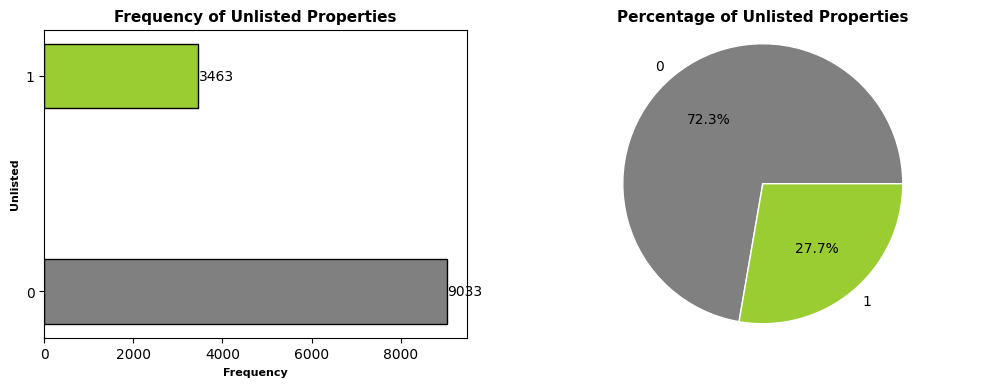

In [14]:
# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar Plot
# Get the counts for each bin in the histogram
counts, bins, patches = axes[0].hist(train['unlisted'], bins=[-0.5, 0.5, 1.5], orientation='horizontal',
                                    rwidth=0.3, color='grey', edgecolor='black')

# Set the color of the second bar to match the pie slice color
patches[1].set_facecolor('yellowgreen')

# Set the title and format it
axes[0].set_title('Frequency of Unlisted Properties', fontsize=11, fontweight='bold')

# Set the x and y axis labels
axes[0].set_xlabel('Frequency', fontsize=8, fontweight='bold')
axes[0].set_ylabel('Unlisted', fontsize=8, fontweight='bold')

# Add text labels with the frequency values next to each bar
for count, y, patch in zip(counts, bins[:-1], patches):
    axes[0].text(count, y + 0.5, str(int(count)), ha='left', va='center', color='black')

# Set the y-axis tick labels
axes[0].set_yticks([0, 1])
axes[0].set_yticklabels(['0', '1'])

# Invert the x-axis
axes[0]

# Pie Chart
# Get the counts of 0 and 1 values
counts = train['unlisted'].value_counts()

# Define the colors for the pie slices
colors = ['grey', 'yellowgreen']

# Create a pie chart
axes[1].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors, wedgeprops={'edgecolor': 'white'})

# Set the title
axes[1].set_title('Percentage of Unlisted Properties', fontsize=11, fontweight='bold')

# Equal aspect ratio ensures that the pie is drawn as a circle
axes[1].axis('equal')

# Show the plot
plt.show()

Regarding the ``unlisted`` feature frequency, we can see that around 72% of the total observations in our data has been unlisted (1), while only almost 28% will remain listed (0) next quarter.

<a id = "word-counts"></a>
#### WORD COUNT HISTOGRAMS

In [17]:
def calculate_wordcount(df, columns):
    """
    Function hat calculates word count for specified columns in a DataFrame
    Argumenmts:
        - df: The DataFrame to calculate word count on.
        - columns: A list of column names to calculate word count for.
    Returns:
        - Nothing; only modifies the DataFrame in-place by adding new columns with word count.
    """
    for column in columns:
        # Apply lambda function to calculate word count for each value in the column
        df[f'WC_{column}'] = df[column].apply(lambda x: len(str(x).split(" ")))

In [18]:
# Defininng a list with the columns to do the word count
train_categorical_columns = ['description', 'host_about']
# Applting the function
calculate_wordcount(train, train_categorical_columns)

In [19]:
def plot_histograms(df, features,bins):
    """
    Plot histograms for specified features in a DataFrame.

    Arguments:
        - df: The DataFrame to plot histograms on.
        - features: A list of feature names to plot histograms for.
    """
    # Calculate the number of rows and columns needed for the subplots
    num_features = len(features)
    num_cols = min(num_features, 2)
    num_rows = math.ceil(num_features / num_cols)

    # Set up the figure and subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 9))
    axes = axes.flatten()

    # Plot the histograms for each feature
    for i, feature in enumerate(features):
        ax = axes[i]  # Select the current axis

        # Plot the histogram with thin black outline
        counts, bins, patches = ax.hist(df[feature], bins=bins, color='grey', edgecolor='black', linewidth=1)

        ax.set_title(feature, y=+1, fontsize=15, fontweight='bold')  # Set the title in bold

        ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')  # Set Y-axis label in bold
        ax.set_xlabel(feature, fontsize=14, fontweight='bold')  # Set X-axis label in bold

        # Set the outline color for each histogram bar
        for patch in patches:
            patch.set_linewidth(0.5)

    # Hide empty subplots if there are fewer features than subplots
    for j in range(num_features, num_rows * num_cols):
        axes[j].axis('off')

    # Add a centered title to the figure with larger font and bold
    title = 'Word Count- Histograms'
    fig.suptitle(title, fontsize=20, fontweight='bold')

    # Show the plot
    plt.show()

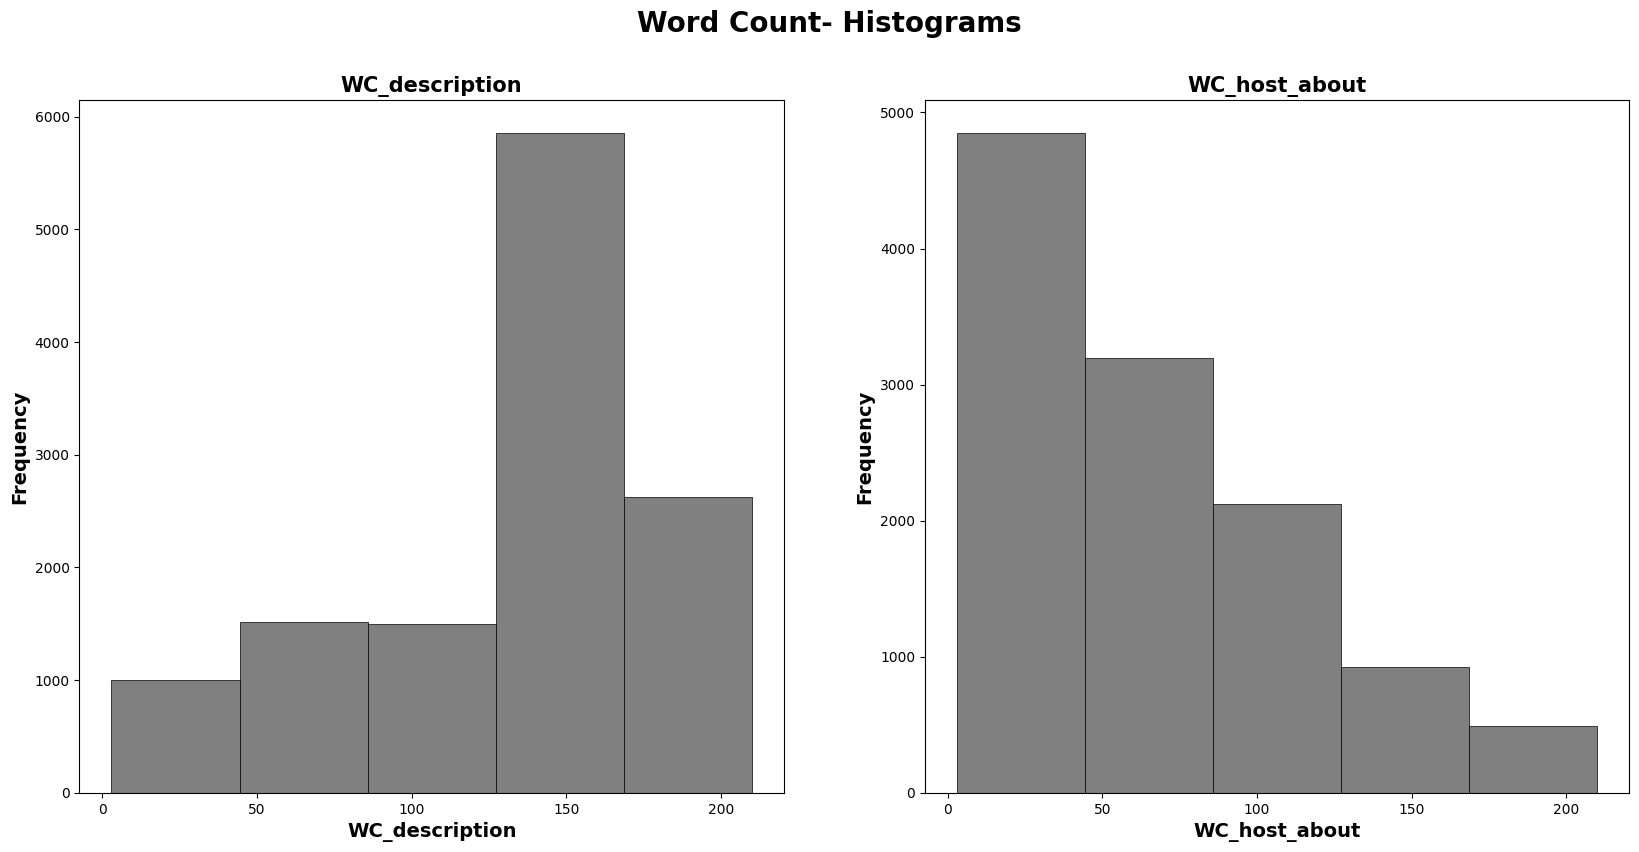

In [20]:
# Defining a list with the columns to plot the histogram
columns_to_plot = ['WC_description','WC_host_about']
# Applying the function to plot the Word Count histograms
plot_histograms(train, columns_to_plot,5)

From the above histograms above we can see that the majority of the observations in the ``desciption`` feature - almost 5.000 observations - have between 150 and 180 words. Regarding the ``host_about`` feature, the majority of those observations (aound 11.000) have between 0 to 150 words.

<a id = "word-clouds"></a>
#### WORD CLOUDS and WORD FREQUENCY HISTOGRAMS

**Word clouds** are visual representations of text data where the size of each word corresponds to its frequency or importance within the text. They offer a concise and intuitive way to explore and summarize textual information. In data analysis, word clouds help identify the most common words or topics in a large text corpus. By visualizing the prominent terms, word clouds provide a high-level overview and assist in understanding the main themes or patterns within the data.

Adapted from: https://gghantiwala.medium.com/using-wordclouds-and-n-grams-to-visualise-text-data-e71e96a3f152

In [21]:
def plot_wordcloud(df, feature):
    """
    Plot a word cloud for a specific feature in a dataframe.

    Arguments:
        - df: The dataframe containing the data
        - feature: The name of the feature/column to create the word cloud for
    """
    comment_words = " ".join(df[feature].astype(str))

    wordcloud = WordCloud(width=1920,
                          height=1080,
                          background_color='white',
                          min_font_size=10,
                          colormap='Paired',
                          collocations=False).generate(comment_words)

    # create figure and axes objects
    fig, ax = plt.subplots(figsize=(16, 9))

    # plot the WordCloud image
    ax.imshow(wordcloud)
    ax.axis("off")

    # adjust the figure layout
    fig.tight_layout(pad=0)

    # show the plot
    plt.show()

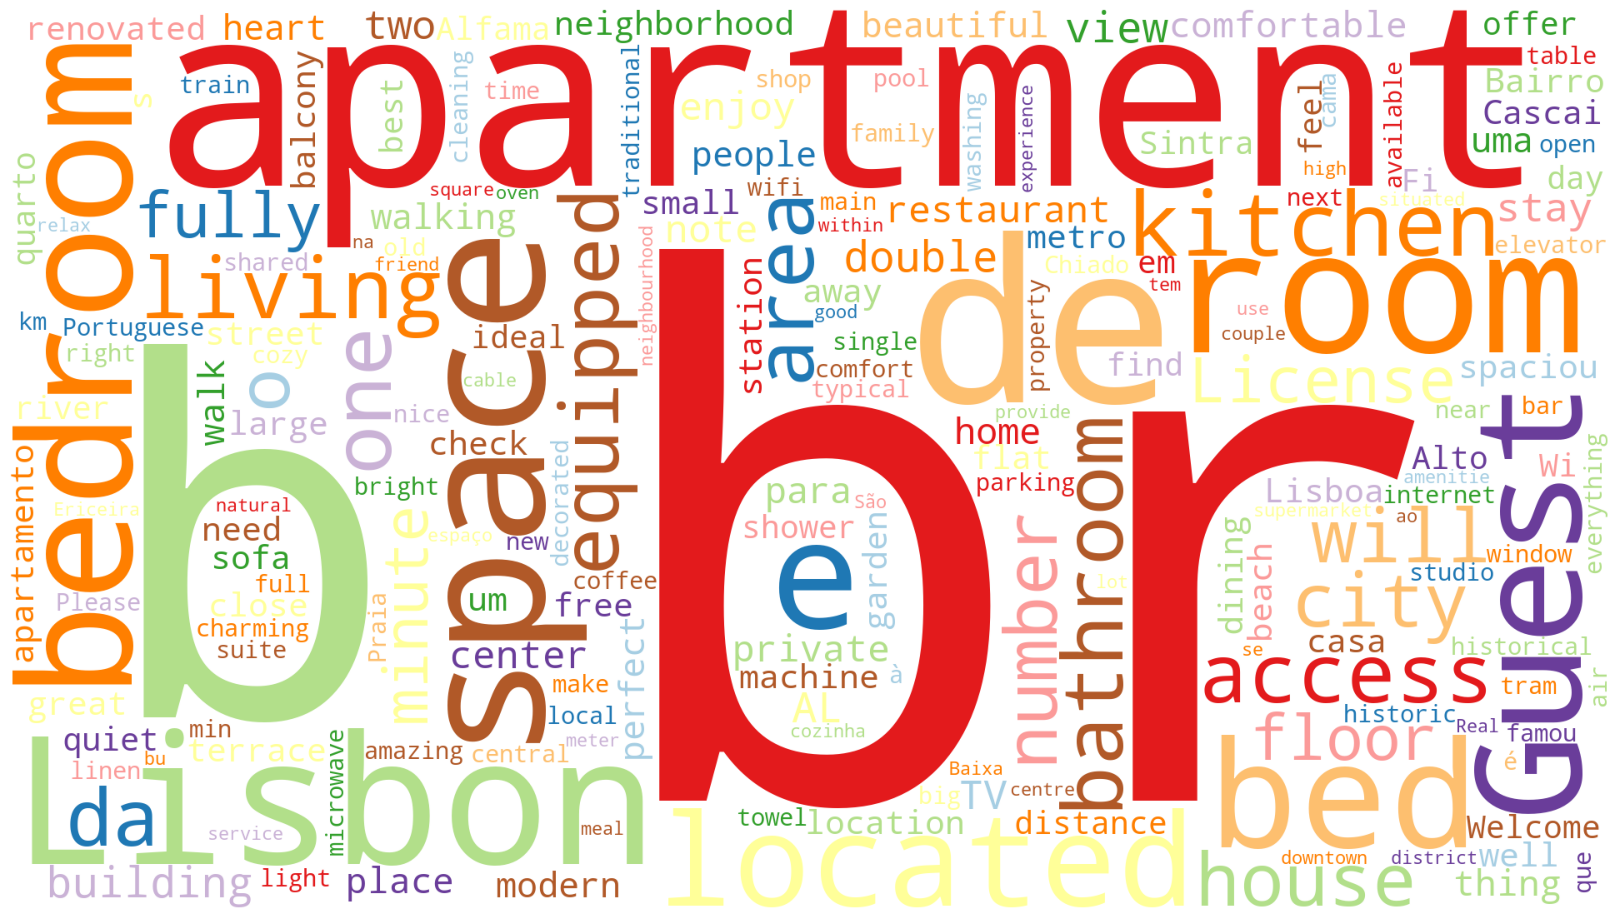

In [22]:
# Plotting a wordcloud for the description feature
plot_wordcloud(train, 'description')

From the above wordcloud we understand that the most common words are "br","b", "apartment", "lisbon", "room", "space", "kitchen", "guest" in the ``description`` feature. We can easily see that this data hasn't yet been preprocessed since the most common word is "br", which is a markdown usage, and also because there are words like "de", "b", "e", among others. For this reason, after preprocessing the data we will make more visualizations to better understand our preprocessed data.

In [ ]:
def plot_word_frequency(df, feature):
    # Concatenate all the words in the specified feature
    words = ' '.join(df[feature].astype(str)).split()

    # Count the frequency of each word
    word_counts = Counter(words)

    # Get the top 10 most common words and their frequencies
    top_words = word_counts.most_common(10)
    top_words, frequencies = zip(*top_words)

    # Plot the word frequencies
    plt.figure(figsize=(16, 9))
    plt.bar(top_words, frequencies, color="grey", edgecolor="black", linewidth=0.5)
    plt.xlabel("Words", fontweight="bold")
    plt.ylabel("Frequency", fontweight="bold")
    plt.title("Top 10 Words of Feature '" + feature +"'", fontweight="bold", fontsize=17)
    plt.xticks(rotation=45, ha="right")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.show()

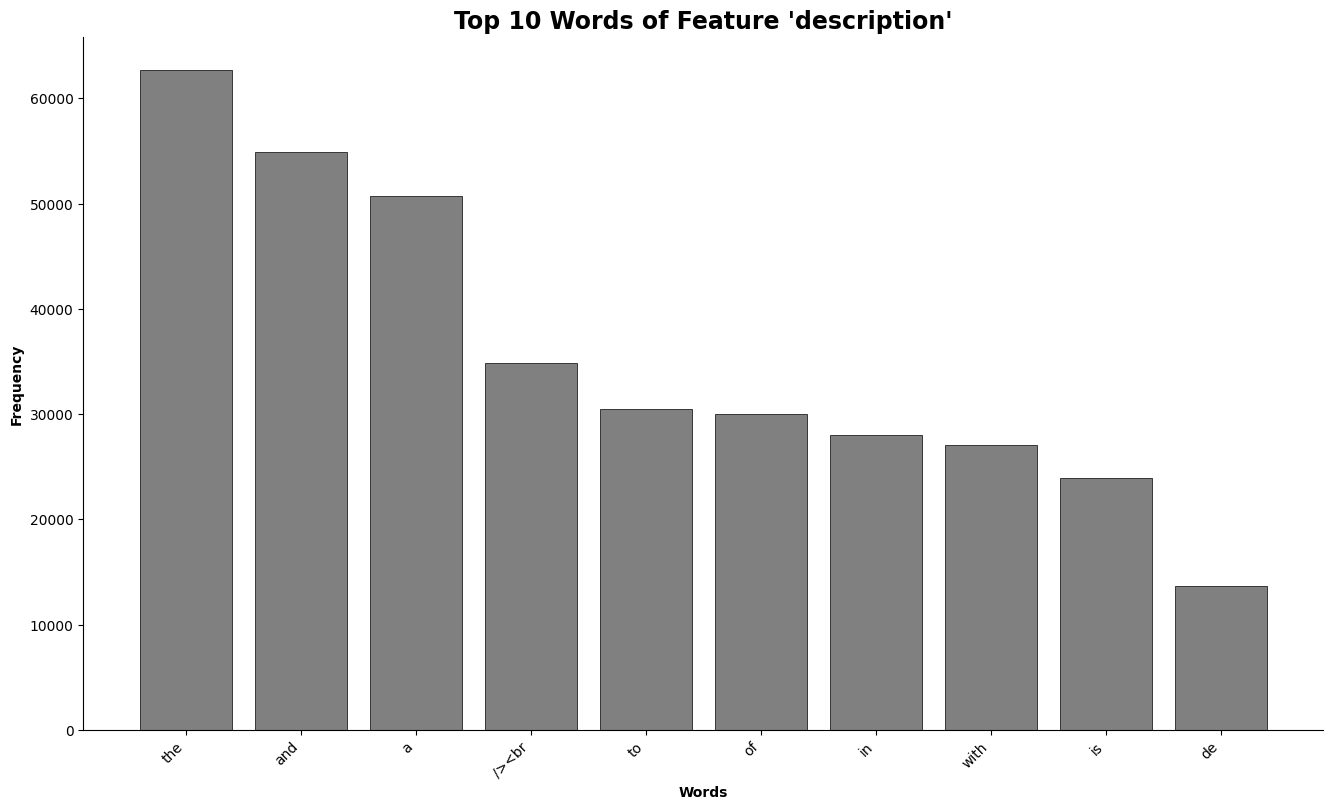

In [25]:
plot_word_frequency(train, "description")

In [26]:
def plot_two_word_frequency(df, feature):
    # Concatenate all the words in the specified feature
    words = ' '.join(df[feature].astype(str)).split()

    # Generate the 2-grams (bigrams)
    bigrams = ngrams(words, 2)

    # Count the frequency of each bigram
    bigram_counts = Counter(bigrams)

    # Get the top 10 most common bigrams and their frequencies
    top_bigrams = bigram_counts.most_common(10)
    top_bigrams, frequencies = zip(*top_bigrams)
    top_bigrams = [' '.join(bigram) for bigram in top_bigrams]  # Convert to list of strings

    # Plot the bigram frequencies
    plt.figure(figsize=(16, 9))
    plt.bar(top_bigrams, frequencies, color="grey", edgecolor="black", linewidth=0.5)
    plt.xlabel("Bigrams", fontweight="bold")
    plt.ylabel("Frequency", fontweight="bold")
    plt.title("Top 10 Bigrams of Feature '" + feature + "'", fontweight="bold", fontsize=17)
    plt.xticks(rotation=45, ha="right")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.show()

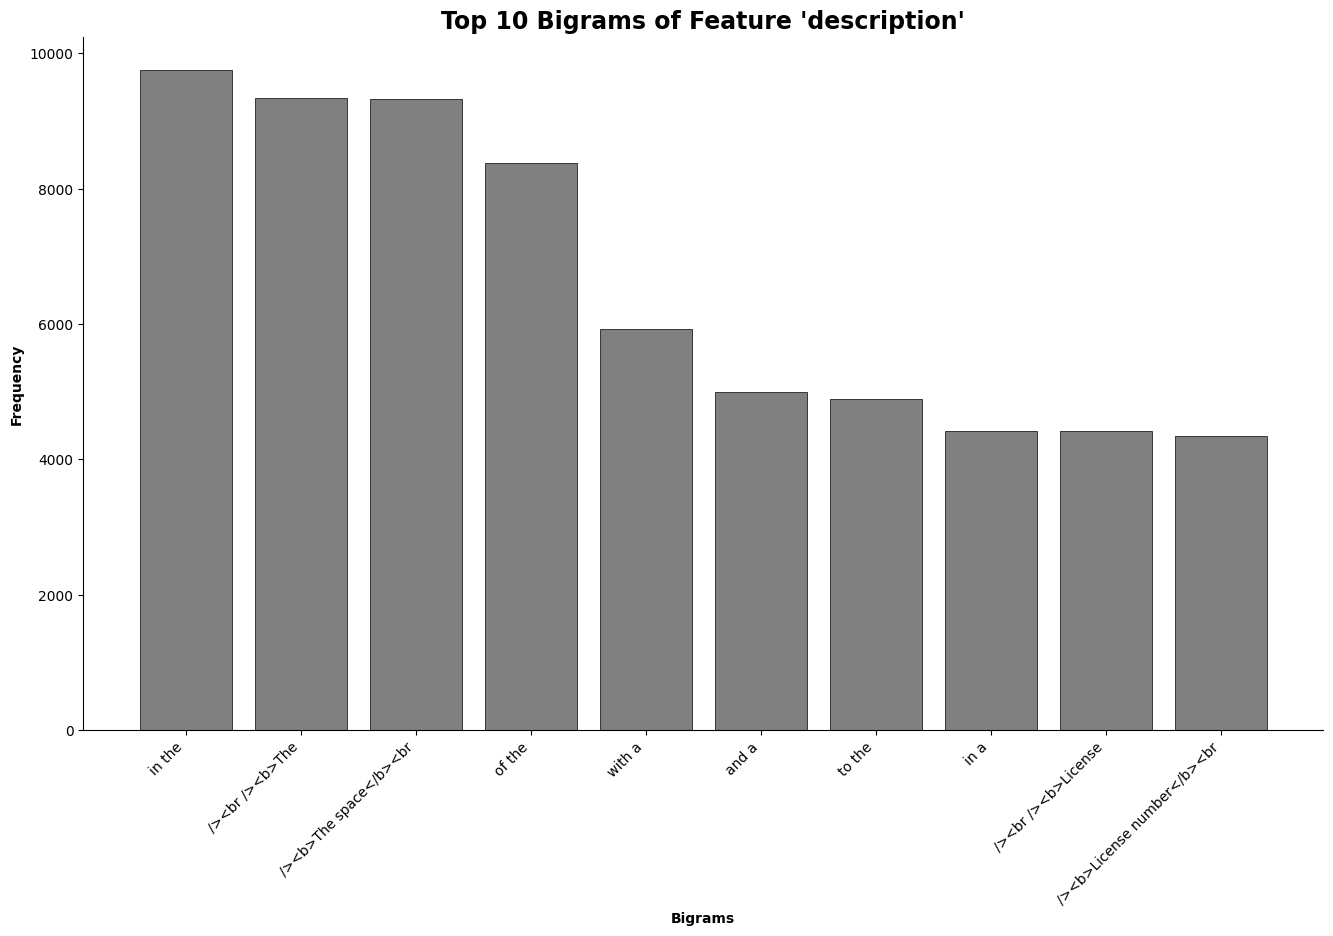

In [27]:
plot_two_word_frequency(train, "description")

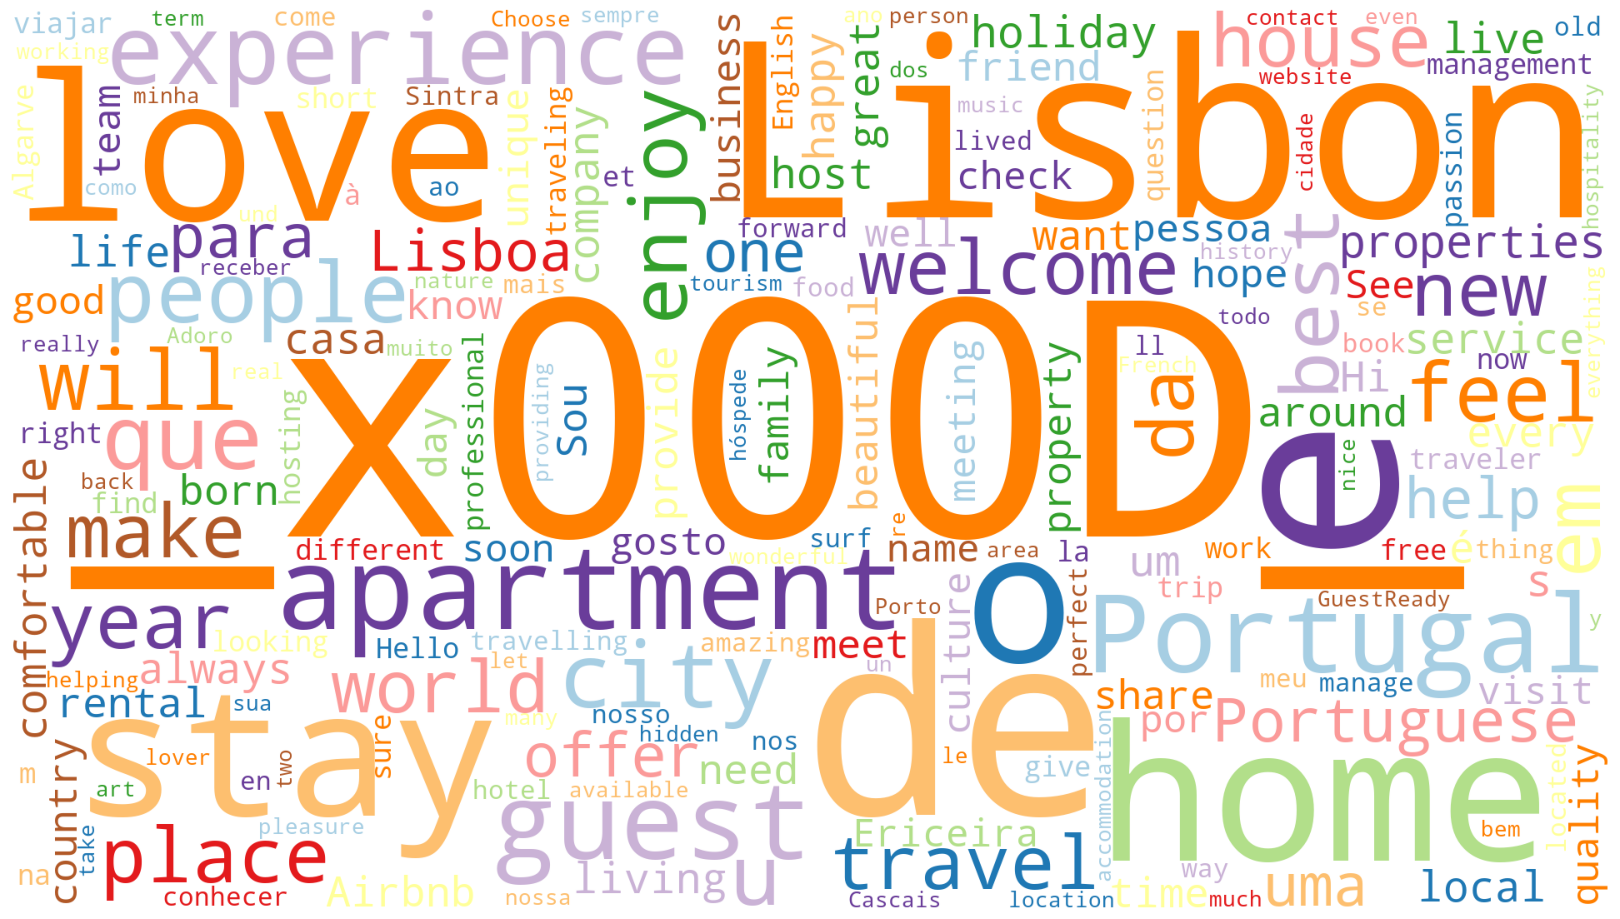

In [28]:
# Plotting a wordcloud for the hot_about feature
plot_wordcloud(train, 'host_about')

From the above wordcloud we understand that the most common words are "_ x000d _","de", "e", "o", "love", "apartment", "I", "lisbon", "home" in the ``host_about`` feature. We can easily see that this data hasn't yet been preprocessed since the most common word is "_x000d_", which is not even a word, and also because there are words like "de", "o", "e", among others. For this reason, after preprocessing the data we will make more visualizations to better understand our preprocessed data.

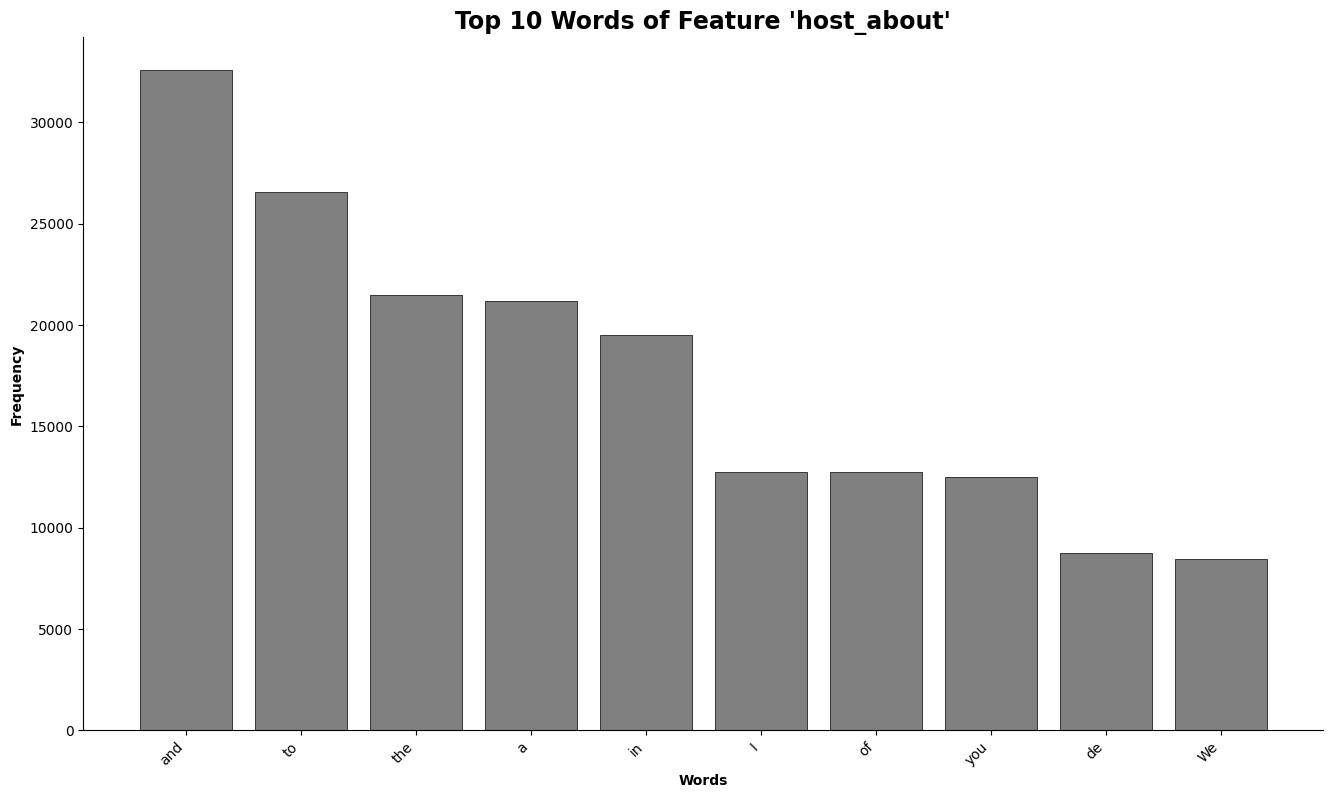

In [29]:
# Plotting the most common words frequency of the host_about
plot_word_frequency(train, "host_about")

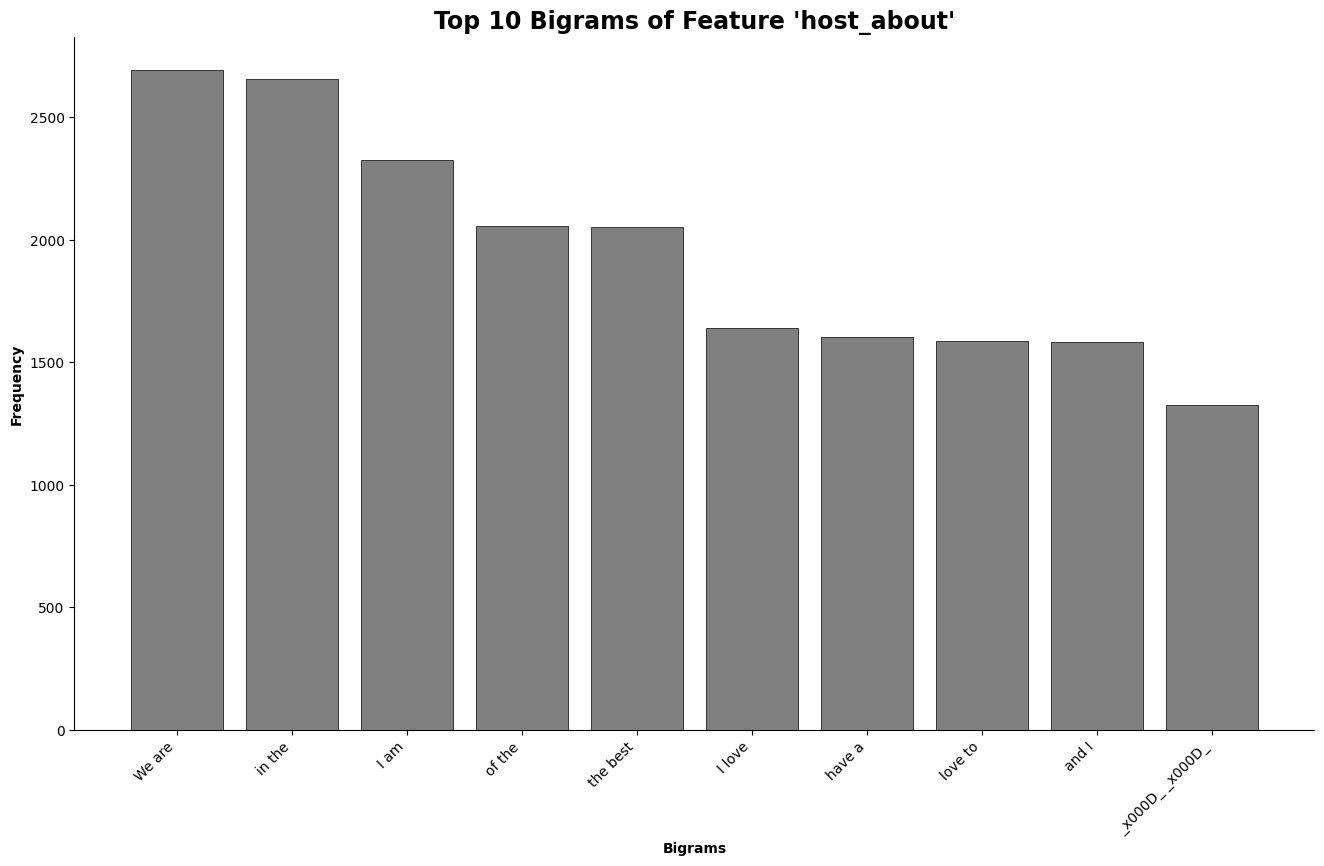

In [30]:
plot_two_word_frequency(train, "host_about")

<a id = "train_reviews"></a>

#### 2.2.2 TRAIN_REVIEWS DATASET

In [33]:
def plot_histogram(df, feature, bins):
    """
    Plot a histogram for a specified feature in a DataFrame.

    Arguments:
        - df: The DataFrame to plot the histogram on.
        - feature: The name of the feature to plot the histogram for.
        - bins: The number of bins for the histogram.
    """
    # Set up the figure and subplot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Convert the values to string representation
    values = df[feature].astype(str)

    # Plot the histogram with thin black outline
    counts, bins, patches = ax.hist(values, bins=bins, color='grey', edgecolor='black', linewidth=1)

    ax.set_title(feature, fontsize=15, fontweight='bold')  # Set the title in bold

    ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')  # Set Y-axis label in bold
    ax.set_xlabel(feature, fontsize=14, fontweight='bold')  # Set X-axis label in bold

    # Set the outline color for each histogram bar
    for patch in patches:
        patch.set_linewidth(0.5)

    # Show the plot
    plt.show()

In [ ]:
# Defining a list with the columns to plot the histogram
columns_to_plot = ['comments']
# Applying the function to plot the Word Count histograms
#plot_histogram(train_reviews, columns_to_plot,5)

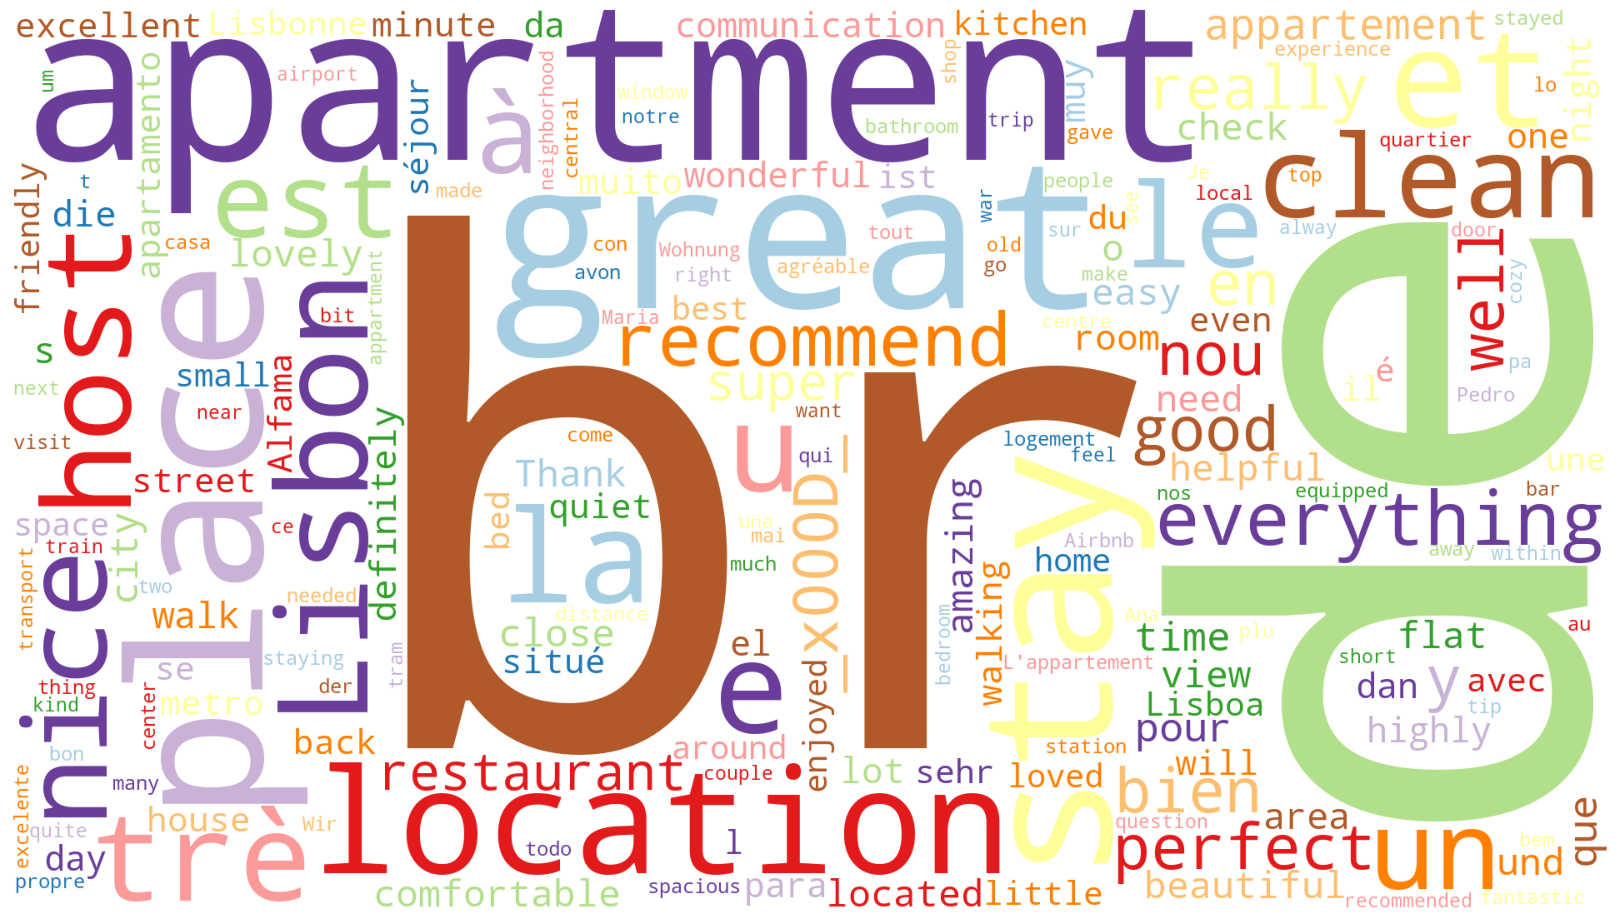

In [68]:
# Plotting a wordcloud for the description feature
plot_wordcloud(train_reviews, 'comments')

In [ ]:
# Plotting the word frequency
plot_word_frequency(train_reviews, "comments")

In [ ]:
plot_two_word_frequency(train_reviews, "comments")

In [71]:
train.drop(["WC_description", "WC_host_about"], axis=1, inplace=True)

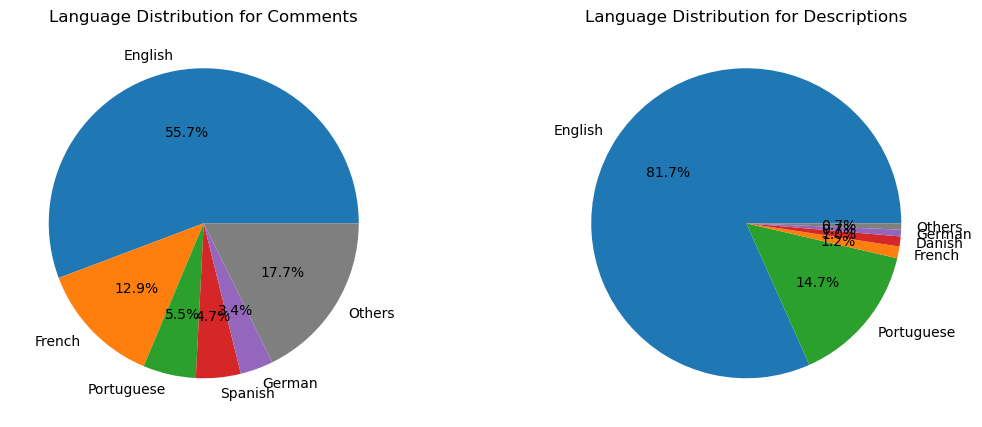

In [72]:
# Language distribution for comments
comment_languages = ['English', 'French', 'Portuguese', 'Spanish', 'German', 'Others']
comment_percentages = [64.02, 14.84, 6.33, 5.36, 3.96, 20.33]
comment_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#7f7f7f']

# Language distribution for descriptions
description_languages = ['English', 'Portuguese', 'French', 'Danish', 'German', 'Others']
description_percentages = [81.67, 14.70, 1.23, 1.04, 0.70, 0.66]
description_colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728', '#9467bd', '#7f7f7f']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the pie chart for comments
ax1.pie(comment_percentages, labels=comment_languages, colors=comment_colors, autopct='%1.1f%%')
ax1.set_title("Language Distribution for Comments")

# Plotting the pie chart for descriptions
ax2.pie(description_percentages, labels=description_languages, colors=description_colors, autopct='%1.1f%%')
ax2.set_title("Language Distribution for Descriptions")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the figure
plt.show()

<div class="alert alert-block alert-success"> <a id = "preprocessing"></a>

## 3. Data Preprocessing

- [3.1. Removing Unnecessary Values](#unnecessary-preprocessing)

- [3.2. Emoji Treatment](#emoji-preprocessing)

- [3.3. Splitting the Dataset](#splitting-dataset-preprocessing)

- [3.4. Removing Unnecessary Observations](#removing-preprocessing)

- [3.5. Spelling and Translation](#spelling-translation-dataset)

- [3.6. Cleaning](#cleaning-dataset)

- [3.7. Data Visualization](#data-visualization-preprocessing)

[Back to TOC](#toc)

<a id = "unnecessary-preprocessing"></a>

### 3.1. Removing Unnecessary Values

As said before, we decided to remove the `host_about` feature, since this feature won't provide us any useful information in the scope of this project.

In [73]:
combined_train.columns

Index(['house_nr', 'description', 'host_about', 'unlisted', 'description_lang',
       'comments', 'comments_lang'],
      dtype='object')

In [74]:
# Deleting the host_about feature
combined_train.drop("host_about", axis=1, inplace=True)

# Filtering the train_reviews dataset to only contain observations with strings - remove the observation that is a zero 0
combined_train = combined_train.loc[combined_train['comments'].apply(lambda x: isinstance(x, str))]

In [75]:
combined_train

,house_nr,description,unlisted,description_lang,comments,comments_lang
0,1,"This is a shared mixed room in our hostel, wit...",0,en,this is a very cozy and comfortable house to s...,en
1,1,"This is a shared mixed room in our hostel, wit...",0,en,good<br/>,cy
2,1,"This is a shared mixed room in our hostel, wit...",0,en,"My first hostel experience, and all I have to ...",en
3,1,"This is a shared mixed room in our hostel, wit...",0,en,Das Hostel war neu und deshalb funktionierte a...,de
4,1,"This is a shared mixed room in our hostel, wit...",0,en,"It was fine for a dorm, but I think for the pe...",en
...,...,...,...,...,...,...
725424,12494,Enjoy breakfast in the sleek kitchen with its ...,0,en,"We had a good time, the apartment has a great ...",en
725425,12494,Enjoy breakfast in the sleek kitchen with its ...,0,en,Great apartment in very central location. The ...,en
725426,12494,Enjoy breakfast in the sleek kitchen with its ...,0,en,"We are Airbnb Super Hosts too, so trust me, Li...",en
725427,12494,Enjoy breakfast in the sleek kitchen with its ...,0,en,We had a lovely stay at this apartment. Sofia ...,en


<a id = "emoji-preprocessing"></a>

### 3.2. Emoji Treatment

Converting emojis to text may leverage sentiment analysis and text mining tools to address the presence of emojis in the comments, which can significantly impact the accuracy of predictions. By converting emojis to text, the function ensures text consistency by removing non-textual elements from the comments and descriptions related to Airbnb listings. This step is vital for maintaining the integrity of the text data and enabling reliable analysis.

Furthermore, the conversion of emojis to text improves sentiment analysis. Emojis often convey emotional cues, and by translating them into text, we can more accurately analyze the sentiment expressed in the comments. This sentiment analysis provides valuable insights into guest experiences and satisfaction levels, which are crucial for predicting Airbnb unlisting.

The function also enhances text mining techniques. Converting emojis to text allows text mining algorithms to focus on extracting meaningful patterns and features from the textual content. This process improves the accuracy and reliability of predictions related to Airbnb unlisting, as it eliminates the noise introduced by emojis.

In conclusion, the convert_emojis_to_text function is an important step in the data preprocessing pipeline for predicting Airbnb unlisting. It ensures text consistency, improves sentiment analysis, and enhances text mining techniques, all of which contribute to more accurate predictions and valuable insights.

In [70]:
languages = ["en", 'es', 'pt', 'it', 'fr', 'de', 'fa', 'id', 'zh', 'ja', 'ko']

def convert_emojis_to_text(dataframe, column_text, column_language):
    """
    Function: convert_emojis_to_text

    Arguments:
    - dataframe: The input dataframe containing the text data
    - column_text: The name of the column containing the text to be processed
    - column_language: The name of the column containing the language information

    Returns:
    - dataframe1: A copy of the input dataframe with emojis converted to text in the specified column
    """

    dataframe1 = dataframe.copy()

    def convert_text(text, language):
        if (has_emojis(text)) and (language in languages):
            return emoji.demojize(text, language = language)
        elif has_emojis(text) and (language not in languages):
            return emoji.demojize(text, language = 'en')
        else:
            return text

    dataframe1[column_text] = dataframe1.apply(lambda row: convert_text(row[column_text], row[column_language]), axis=1)
    return dataframe1

def has_emojis(text):
    if pd.isnull(text):
        return False
    return emoji.emoji_count(str(text)) > 0

In [35]:
def count_emojis(dataframe, column_name):
    total_count = 0
    for index, row in dataframe.iterrows():
        comment = row[column_name]
        if pd.isna(comment) or isinstance(comment, (int, float)):
            continue
        emoji_count = emoji.emoji_count(comment)
        total_count += emoji_count
    return total_count

In [80]:
# Checking the number of emojis on the dataset
print("Nr. of emojis in the train_rest dataset:", count_emojis(combined_train, "comments"))

Nr. of emojis in the train_rest dataset: 18758


In [81]:
# Apply emoji conversion for each language
combined_train_without_emojis = convert_emojis_to_text(combined_train, 'comments', 'comments_lang')

In [82]:
# Checking the number of emojis on each dataset
print("Nr. of emojis in the train_rest_without_emojis dataset:", count_emojis(combined_train_without_emojis, "comments"))

Nr. of emojis in the train_rest_without_emojis dataset: 5


In [83]:
pd.set_option('display.max_colwidth', None)

In [84]:
# Checking the lines with emojis to see if we can do something about it
rest_lines_with_emojis = combined_train_without_emojis[combined_train_without_emojis['comments'].apply(has_emojis)]

# Checking the lines with emojis
rest_lines_with_emojis

,house_nr,description,unlisted,description_lang,comments,comments_lang
133545,2252,"This is a nice room (not a whole apartment) with a fantastic view to the river and the city. It has a double bed and a lot of space for a couple. The bedroom is linked to another smaller that connects to the house. Actually you have 2 rooms .<br />To enjoy with all privacy, this room has it own door that you can lock with a key.<br />This room is inside a house that have more 2 rooms and other 2 more guests, so you will share the kitchen, the bathroom and the living room with other guests!!<br /><br /><b>The space</b><br />Lisbon's most trendy and eco friendly flat is located in the heart of the famous Bairro Alto. The house is small and sunny, there are 2 more rooms.<br />Although this is an area with a very vibrant night life, you can certainly wake up to the sound of birds and enjoy the quietness provided by this very traditional Portuguese neighborhood. <br />Get ready to try some of the best restaurants in town and walk to the most amazing view points this city has to offer. We pr",0,en,"리카르도와 킨지의 집 골목은 조용하고 안전합니다! 한 골목만 넘어가면 주말엔 시끌시끌한데 킨지의 집은 한적하고 조용해요. 위치 자체가 끝내줍니다. 주변 핫스팟들과 가깝구요. <br/>야간 버스를 타려다 주간버스를 타고 도착했는데 처음 새벽도착 하는것도 일일이 신경써서 일찍 체크인 해주려고 한 모습 쏘 스윗... and 리프트 없는 3층에 또 복층이라 20키로가 넘는 캐리어가 참 난감했는데 (계단이 경사가 좀 있어서 위험해요) 체크인, 체크아웃시 킨지가 도와줘서 너무 너무 수월했어요. 너무너무 고마워요. <br/>또 레스토랑과 가볼만한곳 추천도 해주셔서 덕분에 계획없이 온 저는 알려주신 그 장소들을 많이많이 뿌셨구요ఇ <br/>다른 게스트들과 사는 집이지만 거의 저 혼자 지냈어요! 그리고 최고 좋은 뷰와 침대 발 끝 위에있는 창문이 정말 너무좋아요 인테리어 말모..실물이 더 좋습니다. <br/>청결도는 중간에 나간 게스트 방 청소하는 킨지모습보고 안심이 될정도로 심하게 깨끗이 청소하더라구요! ㅋㅋㅋ맨발로 돌아다녔어요ㅜㅋㅋ아 <br/>체크아웃시 택시기사가 취소를 해버려서 다음 여행일정을 못이룰뻔했는데 킨지가 제 캐리어를 들고 뛰고 너무 고생많게ㅜ도와줬어요 흑..진짜 리스본에서 너무 좋은 추억 많이 만들고 가는데 8할이 이 집 호스트때문이에요<br/>진짜 최고...여기 꼭 묵으세요. :거품::흰색_하트:🫶🏻",ko
178327,3009,"Welcome to your HOUSE! Apart for 2 located in the area Santa Catarina centric so you can get all over the city by walking. Bright and cozy a few steps from Chiado, Bairro Alto, Cais do Sodre..tram28. The apartment is refurbished and very confortable<br /><br /><b>License number</b><br />29190/AL",0,en,"Notre sejour chez Dolores a tres bien ete. L'appartement etait propre et bien situé. Dolores a repondu rapidement à toutes nos demandes et a tout fait pour rendre notre sejour facile et agreable. Petits bemols, les voisins etaient un peu bruyants la nuit et la salle de bain est très à l'etroit. Merci encore !! :visage_souriant_avec_yeux_rieurs:🫶🏼:drapeau_portugal:",fr
288522,4913,"Unsere schöne Wohnung Sao Vicente III liegt ruhig und malerisch im 1. Stock am Rande eines schönen Platzes in Lissabons zentralem Altstadtviertel Sao Vicente/Alfama. Die Wohnung ist sorgfältig eingerichtet und verfügt über einen französischen Balkon. Von der Küche hast du einen tollen Blick auf die Klosteranlage Sao Vicente. Unsere Idee zu Lissabon-Altstadt haben wir hier mit diesem Altstadthaus realisiert.<br /><br /><b>The space</b><br />Die Wohnung liegt im 1.Stock eines Altstadthauses. Das originale Treppenhaus ist steil und verfügt über keinen Aufzug. Die Wohnung unterteilt sich in ein Wohnzimmer, davon abgehend ein Alkovenschlafzimmer, eine schmale Küche und ein modernes Badezimmer.<br /><br />Im Wohnzimmer kann man zusätzlich auf einem Schlafsofa bequem schlafen. Das Schlafzimmer verfügt über ein Mahagonibett mit hochwertiger Matratze. Im Wohnzimmer können wir euch zusätzlich das Sofa (1,80m x 0,80m) zum schlafen beziehen. Vom Wohnzimmer schaut man von einem französischen Balkon",0,de,"Die Lage war perfekt, es gab ein Heft mit verschiedensten Tipps und hilfreichen Infos und die Kommunikation hat super funktioniert. Wir haben unseren Aufenthalt dort sehr genossen 🫶🏽",de
617449,10635,"Cosy and sunny 90m² apartment in a 4-storey building in Santo Amaro de Oeiras (Lisbon seaside outskirts). Nicely decorated with both bedrooms offering views on the Quinta dos Sete Castelos garden. It is ideally situated: 10 minutes walking distance from Santo Amaro beach and 5 minutes to its train station, whi

In [85]:
rest_lines_with_emojis.columns

Index(['house_nr', 'description', 'unlisted', 'description_lang', 'comments',
       'comments_lang'],
      dtype='object')

These emojis are probabily from older or newer versions, or may come from different brands of devices, such as Samsung, therefore they are not recognized by our previously created function.

<a id = "splitting-dataset-preprocessing"></a>

### 3.3. Splitting the dataset

In [94]:
# Splitting the dataset
X_train, X_val, y_train, y_val = train_test_split(combined_train[['description',"description_lang","comments","comments_lang","house_nr"]], combined_train[['unlisted',"house_nr"]], test_size=0.3, random_state=4)

In [95]:
X_train_original =X_train.copy()
X_val_original =X_val.copy()
y_train_original =y_train.copy()
y_val_original =y_val.copy()

In [86]:
# Reset the max_colwidth option to its default value
pd.reset_option('display.max_colwidth')

<a id = "removing-preprocessing"></a>

### 3.4. Removing Unnecessary Observations

* Removing observation with less than 2 or less characters
* Transforming the "null values" in "No Comment"
* não acho que o lemmatize traga muitos benefícios mas podemos tentar com e sem
* se mantivermos os nulls temos de os tornar uma string

In [71]:
def remove_short_comments(dataframe, column):
    """
    Function to remove comments with less than 2 characters from a given dataset.

    Arguments:
    - dataframe: The pandas DataFrame containing the dataset.
    - column: The name of the column where the comments are stored.

    Returns:
    - The modified dataframe with short comments removed.
    """

    # Apply a lambda function to filter out comments with less than 2 characters
    dataframe[column] = dataframe[column].apply(lambda comment: comment if len(comment) >= 2 else '')

    # Remove rows where the comment is empty
    dataframe = dataframe[dataframe[column] != '']

    return dataframe

In [97]:
X_train = remove_short_comments(X_train, "comments")
X_val = remove_short_comments(X_val, "comments")

In [98]:
X_train

,description,description_lang,comments,comments_lang,house_nr
59041,"This vacation home offers 3 large bedrooms, 3...",en,"Una casa fantástica, amplia y con calidad en t...",es,1007
125661,This apartment have 3 bedrooms with double bed...,en,"Miguel was a very responsive host, he reply ve...",en,2125
287440,Nice studio in Príncipe Real. <br />It's a 1 d...,en,João's apartment is located in a very cute and...,en,4892
300139,"In the heart of Lisbon (Bairro Alto), is locat...",en,The place is centrally located. The bed is com...,en,5168
286279,Modern apartment up to 4 guests near Marquês d...,en,"The apt. fits the description, is clean and we...",en,4880
...,...,...,...,...,...
643000,A cosy newly renovated two bedroom apartment w...,en,If you are looking for a host with great hospi...,en,11093
657326,"Room in a traditional architecture home, at a ...",en,Sara’s apartment is very close to the center w...,en,11345
121353,Lovely two floor apartment in the heart of Lis...,en,It was perfect for a short stay. The place was...,en,2051
379631,The apartment is located just 8 minutes by wal...,en,We had a fabulous stay at José Manuel’s place....,en,6522


In [99]:
y_train

,unlisted,house_nr
59041,0,1007
125661,0,2125
287440,0,4892
300139,1,5168
286279,0,4880
...,...,...
643000,0,11093
657326,0,11345
121353,0,2051
379631,0,6522


In [100]:
def match_index(X, y):
    # Create a DataFrame with the index from X_train and the target variable from y_train
    df = pd.DataFrame(index=X.index)
    df['target'] = y

    # Merge X_train with the DataFrame containing the target variable
    X_matched = X.merge(df, left_index=True, right_index=True)

    # Retrieve the matched X_train and y_train datasets
    y_matched = X_matched['target']
    X_matched = X_matched.drop(columns='target')

    return X_matched, y_matched

In [72]:
def replace_nan_comments(dataframe, column):
    """
    Function to replace NaN values in the comments feature with "no comment".

    Arguments:
    - dataframe: The pandas DataFrame containing the dataset.
    - column: The name of the column where the comments are stored.

    Returns:
    - The modified dataframe with NaN values replaced.
    """

    # Replace NaN values with "no comment" string
    dataframe[column] = dataframe[column].fillna('commentless')

    return dataframe

In [103]:
# Replace the nan comments
X_train = replace_nan_comments(X_train, "comments")
X_val = replace_nan_comments(X_val, "comments")

<a id = "spelling-translation-dataset"></a>

### 3.5. Spelling and Translation

In [107]:
def translate_text(lang_tgt, text):
    """
    Inputs:
    - lang_tgt: The target language to translate the text into
    - text: The text to be translated

    Returns:
    - translated_text: The translated text in the specified target language
    """

    translated_text = GoogleTranslator(source='auto', target=lang_tgt).translate(text)

    return translated_text

In [108]:
# Creating a smaller subset
X_translation = X_train.head(30)

In [109]:
X_translation.loc[X_translation['comments_lang'] != 'en', 'translated_text'] = X_translation.apply(
    lambda row: translate_text('en', row['comments']) if row['comments_lang'] != 'en' else row['comments'],
    axis=1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17100\283825644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_translation.loc[X_translation['comments_lang'] != 'en', 'translated_text'] = X_translation.apply(


In [110]:
# Checking the translation
X_translation.head()

,description,description_lang,comments,comments_lang,house_nr,translated_text
59041,"This vacation home offers 3 large bedrooms, 3...",en,"Una casa fantástica, amplia y con calidad en t...",es,1007,"A fantastic house, spacious and with quality i..."
125661,This apartment have 3 bedrooms with double bed...,en,"Miguel was a very responsive host, he reply ve...",en,2125,NaN
287440,Nice studio in Príncipe Real. <br />It's a 1 d...,en,João's apartment is located in a very cute and...,en,4892,NaN
300139,"In the heart of Lisbon (Bairro Alto), is locat...",en,The place is centrally located. The bed is com...,en,5168,NaN
286279,Modern apartment up to 4 guests near Marquês d...,en,"The apt. fits the description, is clean and we...",en,4880,NaN


Apesar da translation estar bem feita, esta opção é muito time consuming e é uma merda :)))

In [111]:
# Checking the subset
X_spelling = X_train.head(30)

In [112]:
# Applying the function to translate the text
X_spelling['corrected_text'] = X_spelling['comments'].apply(lambda x: str(TextBlob(x).correct()))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17100\2180808114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_spelling['corrected_text'] = X_spelling['comments'].apply(lambda x: str(TextBlob(x).correct()))


In [113]:
# Checking the head of the spelling dataset
X_spelling.head()

,description,description_lang,comments,comments_lang,house_nr,corrected_text
59041,"This vacation home offers 3 large bedrooms, 3...",en,"Una casa fantástica, amplia y con calidad en t...",es,1007,"Na case fantastic, ample y con calidad en toda..."
125661,This apartment have 3 bedrooms with double bed...,en,"Miguel was a very responsive host, he reply ve...",en,2125,"Nigel was a very responsive host, he reply ver..."
287440,Nice studio in Príncipe Real. <br />It's a 1 d...,en,João's apartment is located in a very cute and...,en,4892,Too's apartment is located in a very cut and s...
300139,"In the heart of Lisbon (Bairro Alto), is locat...",en,The place is centrally located. The bed is com...,en,5168,The place is generally located. The bed is com...
286279,Modern apartment up to 4 guests near Marquês d...,en,"The apt. fits the description, is clean and we...",en,4880,"The apt. fits the description, is clean and we..."


Relativamente ao spelling....

<a id = "cleaning-dataset"></a>

### 3.6. Cleaning

Data cleaning is a crucial step in preparing text data for analysis in text mining projects. It involves removing noise, inconsistencies, and unnecessary elements from the text to improve the quality and reliability of the data. In our project, we have developed a comprehensive function called "clean" that performs various data cleaning processes. Let's explore the key steps performed within this function:


* **Tokenization**: We begin by tokenizing the text, which involves splitting it into individual words or tokens. However, the tokenization step is not explicitly mentioned in the code you provided.

* **Stop Words Removal**: Stop words are common words such as "the," "is," or "in" that often don't contribute much to the overall meaning of the text. Our function removes stop words from the text based on the language being processed. By utilizing a predefined set of stopwords specific to each language, we can eliminate these less informative words.

* **Character Replacement**: Certain characters, such as accented letters or special characters, can vary across languages. To ensure consistency, we replace specific characters with their root character. For example, characters like "à," "á," or "â" would be replaced with "a." This step helps in standardizing the text and reducing variations.

* **Regular Expressions**: Regular expressions are powerful patterns used to manipulate text. In our function, we utilize regular expressions to remove non-alphabetic characters from the text. This ensures that only alphabetic characters, essential for semantic analysis, are retained. Additionally, occurrences of 'br' (commonly found in HTML tags) are replaced with an empty string, eliminating any remnants from web content.

* **Lemmatization**: Lemmatization reduces words to their base or dictionary form. If the lemmatize flag is set to True, our function employs the WordNetLemmatizer from the NLTK library to lemmatize each word in the text. This step helps in normalizing the text and reducing word variations, improving the accuracy of subsequent analysis.

* **Stemming**: Stemming reduces words to their root or stem form by removing suffixes and prefixes. When the stemmer flag is True, our function utilizes the SnowballStemmer from the NLTK library to apply stemming to each word in the text. This simplifies the vocabulary and groups similar words together, aiding in efficient analysis.

* **Language-specific Processing**: To cater to different languages, we determine the language associated with each text by referring to the "comments_lang" feature. Based on this language identification, we download the appropriate set of stopwords specific to that language. This language-specific processing further enhances the accuracy and relevance of the cleaned text.

By integrating these steps into the "clean" function, we can effectively preprocess and clean the text data, ensuring its suitability for subsequent analysis and modeling tasks in our text mining project.

In [ ]:
['en'
 , 'fr',
 'de',
 'it',
 'es',
 'nl', 'pt',
 'ca',
 'ko', 
 'id',
 'pl',
       'ro'
 , 'af', 
 'zh-cn', 
 'ru',
 'fi',
 'tr',
 'sv', 
 'cs', 
 
 'cy', '
 sk',
 
 
       'tl',
 'hu',
 'lt',
 'zh-tw'
 , 'ar',
 'da', 'el', 
 'he',
 'bg',
 'no',
 
       'ja',
 'vi',
 'so',
 'hr',
 'mk', 
 'et', 
 'sw',
 'uk',
 'kn',
 'lv', 'sl']

In [19]:
lang_dict = {
    'en': 'English',
    'cy': 'Welsh',
    'de': 'German',
    'fr': 'French',
    'es': 'Spanish',
    'pt': 'Portuguese',
    'ru': 'Russian',
    'nl': 'Dutch',
    'it': 'Italian',
    'ko': 'Korean',
    'zh-cn': 'Chinese (Simplified)',
    'he': 'Hebrew',
    'Unknown': 'Unknown',
    'id': 'Indonesian',
    'pl': 'Polish',
    'no': 'Norwegian',
    'so': 'Somali',
    'da': 'Danish',
    'sq': 'Albanian',
    'ro': 'Romanian',
    'ca': 'Catalan',
    'hr': 'Croatian',
    'ja': 'Japanese',
    'zh-tw': 'Chinese (Traditional)',
    'tr': 'Turkish',
    'cs': 'Czech',
    'ar': 'Arabic',
    'af': 'Afrikaans',
    'sk': 'Slovak',
    'sv': 'Swedish',
    'tl': 'Tagalog',
    'lv': 'Latvian',
    'hu': 'Hungarian',
    'el': 'Greek',
    'sl': 'Slovenian',
    'fi': 'Finnish',
    'sw': 'Swahili',
    'et': 'Estonian',
    'vi': 'Vietnamese',
    'uk': 'Ukrainian',
    'lt': 'Lithuanian',
    'mk': 'Macedonian',
    'bg': 'Bulgarian',
    'ur': 'Urdu',
    'th': 'Thai',
    'ne': 'Nepali'
}

In [13]:
nltk.data.path

['C:\\Users\\Cláudia Rocha/nltk_data',
 'C:\\ProgramData\\Anaconda3\\nltk_data',
 'C:\\ProgramData\\Anaconda3\\share\\nltk_data',
 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data',
 'C:\\Users\\Cláudia Rocha\\AppData\\Roaming\\nltk_data',
 'C:\\nltk_data',
 'D:\\nltk_data',
 'E:\\nltk_data']

In [15]:
stopwords_path = nltk.data.find('corpora/stopwords')
stopwords_path

FileSystemPathPointer('C:\\Users\\Cláudia Rocha\\AppData\\Roaming\\nltk_data\\corpora\\stopwords')

In [23]:
def clean(dataframe, column, lang_filter, lang_dict, lemmatize, stemmer):
    """
    Clean the text in the specified column of a DataFrame based on language and other options.

    Arguments:
    - dataframe: The input DataFrame.
    - column: The name of the column to clean.
    - lang_filter: The column to filter based on language.
    - lang_dict: A dictionary mapping language codes to language names.
    - lemmatize: A boolean flag indicating whether to perform lemmatization.
    - stemmer: A boolean flag indicating whether to perform stemming.

    Returns:
    - A dictionary where the key is the index of the DataFrame and the value is the modified text.
    """

    # Initialize empty dictionary to store cleaned texts
    updates = {}

    # Define character replacement mappings
    replacements = {
        'a': ['à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ā'],
        'e': ['è', 'é', 'ê', 'ë', 'ē'],
        'i': ['ì', 'í', 'î', 'ï'],
        'o': ['ò', 'ó', 'ô', 'õ', 'ö', 'ø', 'œ'],
        'u': ['ù', 'ú', 'û', 'ü', 'ū', 'ů'],
        'c': ['ç'],
        'n': ['ñ'],
        's': ['ś', 'š', 'ß'],
        'z': ['ź', 'ż', 'ž']
    }

    # Iterate over the rows of the dataframe
    for index, row in tqdm(dataframe.iterrows()):
        text = row[column]
        language_small = row[lang_filter]

        # Retrieve the language name from the dictionary using the language code
        language = lang_dict.get(language_small, '')

        try:
            # Download the stopwords for the specified language if not available
            nltk.data.find(f"corpora/stopwords/{language.lower()}")
        except LookupError:
            # Skip the comment if stopwords for the language are not available
            continue

        # Convert the text to lowercase
        text = text.lower()

        # Replace specific characters with their root character
        for char, replacements_list in replacements.items():
            for replacement in replacements_list:
                text = text.replace(replacement, char)

        # Replace '?' with token
        text = re.sub('\?', '[interrogation]', text)

        # Replace '!' with token
        text = re.sub('\!', '[exclamation]', text)

        # Replace numbers with token
        text = re.sub('\d+', '[number]', text)

        # Remove non-alphabetic characters and replace 'br' with an empty string
        text = re.sub("[^a-zA-Z]", " ", text)
        text = re.sub("br", "", text)

        # Remove stopwords from the text by splitting it into words and filtering out the stop words
        stop = set(stopwords.words(language))
        text = " ".join([word for word in text.split() if word not in stop])

        # If lemmatize flag is True, lemmatize each word in the text
        if lemmatize:
            lemma = WordNetLemmatizer()
            text = " ".join(lemma.lemmatize(word) for word in text.split())

        # If stemmer flag is True, apply stemming to each word in the text
        if stemmer:
            stemmer = SnowballStemmer(language)
            text = " ".join(stemmer.stem(word) for word in text.split())

        # Get the index of the row
        key = index

        # Add the cleaned text to the updates dictionary with the key
        updates[key] = text

    return updates

In [ ]:
def clean(dataframe, column, lang_filter, lang_dict, lemmatize, stemmer):
    """
    Clean the text in the specified column of a DataFrame based on language and other options.

    Arguments:
    - dataframe: The input DataFrame.
    - column: The name of the column to clean.
    - lang_filter: The column to filter based on language.
    - lang_dict: A dictionary mapping language codes to language names.
    - lemmatize: A boolean flag indicating whether to perform lemmatization.
    - stemmer: A boolean flag indicating whether to perform stemming.

    Returns:
    - A dictionary where the key is the index of the DataFrame and the value is the modified text.
    """

    # Initialize empty dictionary to store cleaned texts
    updates = {}

    # Define character replacement mappings
    replacements = {
        'a': ['à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ā'],
        'e': ['è', 'é', 'ê', 'ë', 'ē'],
        'i': ['ì', 'í', 'î', 'ï'],
        'o': ['ò', 'ó', 'ô', 'õ', 'ö', 'ø', 'œ'],
        'u': ['ù', 'ú', 'û', 'ü', 'ū', 'ů'],
        'c': ['ç'],
        'n': ['ñ'],
        's': ['ś', 'š', 'ß'],
        'z': ['ź', 'ż', 'ž']
    }

    # Iterate over the rows of the dataframe
    for index, row in tqdm(dataframe.iterrows()):
        text = row[column]
        language_small = row[lang_filter]

        # Retrieve the language name from the dictionary using the language code
        language = lang_dict.get(language_small, '')

        try:
            # Download the stopwords for the specified language if not available
            nltk.data.find(f"C:\\Users\\Cláudia Rocha\\AppData\\Roaming\\nltk_data\\corpora\\stopwords{language.lower()}")
        except LookupError:
            # Skip the comment if stopwords for the language are not available
            continue

        # Convert the text to lowercase
        text = text.lower()

        # Replace specific characters with their root character
        for char, replacements_list in replacements.items():
            for replacement in replacements_list:
                text = text.replace(replacement, char)

        # Replace '?' with token
        text = re.sub('\?', '[interrogation]', text)

        # Replace '!' with token
        text = re.sub('\!', '[exclamation]', text)

        # Replace numbers with token
        text = re.sub('\d+', '[number]', text)

        # Remove non-alphabetic characters and replace 'br' with an empty string
        text = re.sub("[^a-zA-Z]", " ", text)
        text = re.sub("br", "", text)

        # Remove stopwords from the text by splitting it into words and filtering out the stop words
        stop = set(stopwords.words(language))
        text = " ".join([word for word in text.split() if word not in stop])

        # If lemmatize flag is True, lemmatize each word in the text
        if lemmatize:
            lemma = WordNetLemmatizer()
            text = " ".join(lemma.lemmatize(word) for word in text.split())

        # If stemmer flag is True, apply stemming to each word in the text
        if stemmer:
            stemmer = SnowballStemmer(language)
            text = " ".join(stemmer.stem(word) for word in text.split())

        # Get the index of the row
        key = index

        # Add the cleaned text to the updates dictionary with the key
        updates[key] = text

    return updates

In [116]:
# Call the clean function for the comments feature
x_train_cleaned = clean(X_train, "comments", "comments_lang", lang_dict, lemmatize=True, stemmer=False)

# Call the clean function for the comments feature
x_val_cleaned = clean(X_val, "comments", "comments_lang", lang_dict, lemmatize=True, stemmer=False)

# Call the clean function for the description feature
x_train_description_cleaned = clean(X_train, "description", "description_lang", lang_dict, lemmatize=True, stemmer=False)

# Call the clean function for the description feature
x_val_description_cleaned = clean(X_val, "description", "description_lang", lang_dict, lemmatize=True, stemmer=False)

503901it [08:03, 1041.61it/s]
215951it [03:22, 1064.80it/s]
503901it [10:54, 769.64it/s]
215951it [04:35, 784.27it/s]


In [54]:
# estou a tentar esta!
def add_cleaned_features(dataframe, cleaned_comments_dict, column_name):
    """
    Add cleaned comments from the dictionary to a new column in the specified dataframe.

    Arguments:
    - dataframe: The input DataFrame.
    - cleaned_comments_dict: A dictionary mapping indices to cleaned comments.
    - column_name: The name of the column to add.

    Returns:
    - The modified DataFrame with the added column.
    """

    # Create an empty list to store the cleaned comments
    cleaned_comments = []

    # Iterate over the rows of the dataframe
    for index, row in dataframe.iterrows():
        cleaned_comment = cleaned_comments_dict.get(index, '')
        cleaned_comments.append(cleaned_comment)

    # Assign the list of cleaned comments as a new column with the specified name
    dataframe[column_name] = cleaned_comments

    return dataframe

In [118]:
# Create a column with the cleaned comments in the train dataset
X_train = add_cleaned_features(X_train, x_train_cleaned, "cleaned_comment")
# Create a column with the cleaned comments in the val dataset
X_val = add_cleaned_features(X_val, x_val_cleaned, "cleaned_comment")
# Create a column with the cleaned description in the train dataset
X_train = add_cleaned_features(X_train, x_train_description_cleaned, "cleaned_description")
# Create a column with the cleaned description in the val dataset
X_val = add_cleaned_features(X_val, x_val_description_cleaned, "cleaned_description")

In [119]:
# Checking the X_train dataset
X_train

,description,description_lang,comments,comments_lang,house_nr,cleaned_comment,cleaned_description
59041,"This vacation home offers 3 large bedrooms, 3...",en,"Una casa fantástica, amplia y con calidad en t...",es,1007,casa fantastica amplia calidad toda estancias ...,vacation home offer number large bedroom numbe...
125661,This apartment have 3 bedrooms with double bed...,en,"Miguel was a very responsive host, he reply ve...",en,2125,miguel responsive host reply quickly accuratel...,apartment number bedroom double bed best area ...
287440,Nice studio in Príncipe Real. <br />It's a 1 d...,en,João's apartment is located in a very cute and...,en,4892,joao apartment located cute safe neighborhood ...,nice studio principe real number division apar...
300139,"In the heart of Lisbon (Bairro Alto), is locat...",en,The place is centrally located. The bed is com...,en,5168,place centrally located bed comfortable hear b...,heart lisbon bairro alto located historic area...
286279,Modern apartment up to 4 guests near Marquês d...,en,"The apt. fits the description, is clean and we...",en,4880,apt fit description clean well equipped howeve...,modern apartment number guest near marque de p...
...,...,...,...,...,...,...,...
643000,A cosy newly renovated two bedroom apartment w...,en,If you are looking for a host with great hospi...,en,11093,looking host great hospitality flexible check ...,cosy newly renovated two bedroom apartment lar...
657326,"Room in a traditional architecture home, at a ...",en,Sara’s apartment is very close to the center w...,en,11345,sara apartment close center number minute walk...,room traditional architecture home number rd g...
121353,Lovely two floor apartment in the heart of Lis...,en,It was perfect for a short stay. The place was...,en,2051,perfect short stay place well stocked comdy ri...,lovely two floor apartment heart lisbon locate...
379631,The apartment is located just 8 minutes by wal...,en,We had a fabulous stay at José Manuel’s place....,en,6522,fabulous stay jose manuel place excellent host...,apartment located number minute walk exclusive...


In [120]:
# Creating a function to create word counting
def count_words(df, column_name):
    df['word_count'] = df[column_name].apply(lambda x: len(str(x).split()) if str(x).lower() != 'commentless' else 0)
    return df

In [121]:
# Applying the function previously created
data_counted = count_words(X_train, 'comments')

In [122]:
X_train_all = X_train.copy()
X_val_all = X_val.copy()

Now, we are going to join our ``cleaned_comment`` feature with the ``cleaned_description`` feature

In [ ]:
X_train_concatenated = pd.read_csv("X_train_concatenated.csv")
X_val_concatenated = pd.read_csv("X_val_concatenated.csv")

In [ ]:
X_train_concatenated

In [ ]:
X_val_concatenated

In [ ]:
X_train = X_train_concatenated
X_val = X_val_concatenated

In [123]:
########## X_TRAIN DATASET
# Remove unnecessary columns from the train dataset
X_train.drop(["description","description_lang","comments","comments_lang"],axis=1,inplace=True)
# Concatenate cleaned comments per house number
X_train['all_comments'] = X_train.groupby('house_nr')['cleaned_comment'].transform(lambda x: ' '.join(str(comment) for comment in x))

# Concatenate cleaned description to all_comments
X_train['comments_and_desc'] = X_train['all_comments'] + ' ' + X_train['cleaned_description']

# Drop the duplicates
X_train = X_train[['house_nr', 'comments_and_desc']].drop_duplicates()

# Drop rows with NaN values in 'comments_and_desc' column
X_train.dropna(subset=['comments_and_desc'], inplace=True)

########### X_VAL DATASET
# Remove unnecessary columns from the validation dataset
X_val.drop(["description","description_lang","comments","comments_lang"],axis=1,inplace=True)

# Concatenate cleaned comments per house number
X_val['all_comments'] = X_val.groupby('house_nr')['cleaned_comment'].transform(lambda x: ' '.join(str(comment) for comment in x))

# Concatenate cleaned description to all_comments
X_val['comments_and_desc'] = X_val['all_comments'] + ' ' + X_val['cleaned_description']

# Drop the duplicates
X_val = X_val[['house_nr', 'comments_and_desc']].drop_duplicates()

# Drop rows with NaN values in 'comments_and_desc' column
X_val.dropna(subset=['comments_and_desc'], inplace=True)

In [124]:
# Checking the train dataframe
X_train

,house_nr,comments_and_desc
59041,1007,casa fantastica amplia calidad toda estancias ...
125661,2125,miguel responsive host reply quickly accuratel...
287440,4892,joao apartment located cute safe neighborhood ...
300139,5168,place centrally located bed comfortable hear b...
286279,4880,apt fit description clean well equipped howeve...
...,...,...
213185,3595,thankyou stay attentiveness bedroom kitchen on...
676083,11661,super zeit tiny house dasilva surfcamp exclama...
168537,2825,stayed whole month august fantastic time flat ...
626878,10803,great stay lisbon got job done place close ave...


In [125]:
# Checking the validation dataframe
y_train

,unlisted,house_nr
59041,0,1007
125661,0,2125
287440,0,4892
300139,1,5168
286279,0,4880
...,...,...
643000,0,11093
657326,0,11345
121353,0,2051
379631,0,6522


In [126]:
# Group y_train by house_nr
y_train = y_train.groupby('house_nr').first()
# Group y_val by house_nr
y_val = y_val.groupby('house_nr').first()
# Set the X_train index as the house_nr
X_train.set_index('house_nr', inplace=True)
# Set the X_valid index as the house_nr
X_val.set_index('house_nr', inplace=True)

In [138]:
# Checking the X_train
X_train.head()

,comments_and_desc
house_nr,
1007,casa fantastica amplia calidad toda estancias ...
2125,miguel responsive host reply quickly accuratel...
4892,joao apartment located cute safe neighborhood ...
5168,place centrally located bed comfortable hear b...
4880,apt fit description clean well equipped howeve...


In [140]:
# Checking the y_train
y_train.head()

,unlisted
house_nr,
1,0
5,0
8,0
9,0
10,0


In [141]:
# Checking the X_val
X_val.head()

,comments_and_desc
house_nr,
10682,could asked better place lisbon wonderful loca...
2189,tres bon emplacement quartier alfama fado pouv...
1797,recommend anyone everyone stay exclamation sta...
70,really enjoyed stay flat super clean easy spac...
9925,great time maria appartment well located appar...


In [142]:
# Checking the X_val
y_val.head()

,unlisted
house_nr,
1,0
5,0
8,0
9,0
10,0


#### Notas:

* se mantivermos os nulls temos de os tornar uma string - tornám-los em "commentless"

Extra work para considerar fazermos aqui no preprocessing:

* Text Normalization: Text normalization involves transforming text into a standardized format to reduce variations and improve consistency. Some techniques you can consider are:

* Case Normalization: Convert all text to lowercase or uppercase to treat words with different cases as the same.
URL and Email Address Removal: Remove URLs and email addresses from the text as they may not contribute to the analysis or classification task.

* Numeric Tokenization: Separate numbers from text to treat them as separate tokens or replace them with a common symbol.
N-grams Generation: N-grams are contiguous sequences of n words in a given text. By considering n-grams, you can capture more contextual information and potentially improve the performance of your model. Some options include:

* Unigrams, bigrams, or trigrams: Generate n-grams of varying lengths (single words, pairs, or triplets) from your text data.
Include n-grams as additional features in your feature space alongside individual words.

<a id = "data-visualization-preprocessing"></a>

### 3.7. Data Visualization

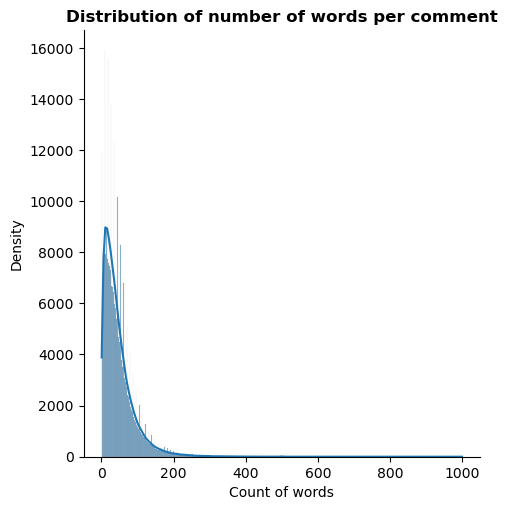

<Figure size 1600x900 with 0 Axes>

In [137]:
# Assuming your DataFrame is called 'diamonds'
plot = sns.displot(data=data_counted, x="word_count", kde=True)

# Set labels and title
plt.xlabel('Count of words')
plt.ylabel('Density')
plt.title('Distribution of number of words per comment', fontweight='bold', fontsize=12)

# Set the plot size
plt.figure(figsize=(16, 9))

# Display the plot
plt.show()

<div class="alert alert-block alert-success"> <a id = "feature-engineering"></a>

## 4. Feature Engineering

- [4.1. Sentiment Analysis](#sentiment-analysis-fe)

- [4.2. TF-IDF](#tf-idf-fe)

    - [SMOTE](#smote-tfidf)
    
- [4.3. Bag Of Worfs](#bow-fe)

    - [SMOTE](#smote-bow)

- [4.4. GloVe Embeddings](#glove-fe)

[Back to TOC](#toc)

In [2]:
# Creating a copy of the x datasets
X_train = pd.read_csv('X_train.csv').set_index('house_nr')
X_val = pd.read_csv('X_val.csv').set_index('house_nr')
# Creating a copy of the y datasets
y_train = pd.read_csv('y_train.csv').set_index('house_nr')
y_val = pd.read_csv('y_val.csv').set_index('house_nr')

<a id = "sentiment-analysis-fe"></a>

### 4.1. Sentiment Analysis

In [155]:
# Redading the y_train and y_val
X_train_sa = X_train.copy()
y_train_sa = y_train.copy()
# Redading the y_train and y_val
X_val_sa = X_val.copy()
y_val_sa = y_val.copy()

In [156]:
# Perform sentiment analysis on preprocessed text
X_train_sa['sentiment'] = X_train_sa['comments_and_desc'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Classify sentiment into positive, negative, or neutral
X_train_sa['sentiment_label'] = X_train_sa['sentiment'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')

In [157]:
X_train_sa

,comments_and_desc,sentiment,sentiment_label
house_nr,,,
1,nan bonne auberge jeunes top well located clea...,0.303960,Positive
5,excelente localizacao vista perfeita nice apar...,0.426213,Positive
8,perfect location met exceded expectation reali...,0.399927,Positive
9,comfortable well equipped clean ground floor a...,0.313480,Positive
10,gorgeous apartment location exclamation beauti...,0.368504,Positive
...,...,...,...
12490,bit far center nice studio service bom apartam...,0.281394,Positive
12491,casa grande local tranquilo proxima tudo preci...,0.297297,Positive
12492,wohnung beschrieben zentral catarina immer ans...,0.344640,Positive


In [158]:
# Group the sentiment counts by sentiment label and language
sentiment_counts = X_train_sa.groupby(['sentiment_label']).size().reset_index(name='count')

In [159]:
sentiment_counts

,sentiment_label,count
0,Negative,21
1,Neutral,32
2,Positive,8320


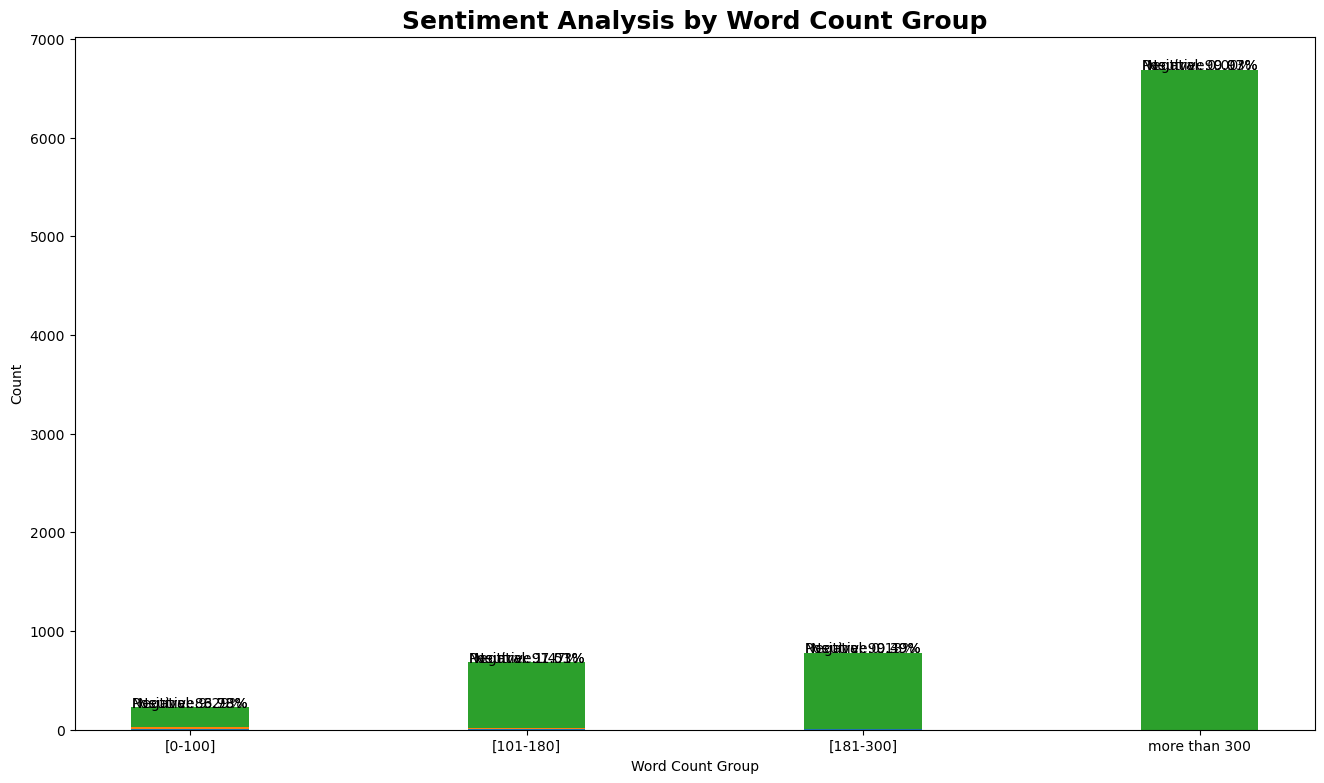

In [160]:
# Function to categorize word counts into groups
def categorize_word_count(word_count):
    if word_count <= 100:
        return "[0-100]"
    elif word_count <= 180:
        return "[101-180]"
    elif word_count <= 300:
        return "[181-300]"
    else:
        return "more than 300"

# Calculate the word count for each comment
X_train_sa['word_count'] = X_train_sa['comments_and_desc'].apply(lambda text: len(text.split()))

# Categorize the word count into groups
X_train_sa['word_count_group'] = X_train_sa['word_count'].apply(categorize_word_count)

# Group the sentiment counts by word count group and sentiment label
sentiment_counts = X_train_sa.groupby(['word_count_group', 'sentiment_label']).size().unstack().fillna(0)

# Calculate the percentage of each sentiment per group
sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

# Define the word count groups and sentiment labels
word_count_groups = sentiment_counts.index
sentiment_labels = sentiment_counts.columns
num_sentiments = len(sentiment_labels)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(16, 9))
width = 0.35

# Initialize the bottom position for each sentiment
bottom = np.zeros(len(word_count_groups))

# Plot each sentiment as a stacked bar
for i in range(num_sentiments):
    sentiment_data = sentiment_counts.iloc[:, i]
    ax.bar(word_count_groups, sentiment_data, width, bottom=bottom, label=sentiment_labels[i])
    bottom += sentiment_data

# Set the title and labels
plt.title('Sentiment Analysis by Word Count Group', fontsize=18, fontweight='bold')
plt.xlabel('Word Count Group')
plt.ylabel('Count')

# Add a legend on top of the whole bar for each sentiment
for i in range(len(word_count_groups)):
    sentiment_percentages_group = sentiment_percentages.loc[word_count_groups[i]]
    total_height = sentiment_counts.loc[word_count_groups[i]].sum()
    for j in range(num_sentiments):
        sentiment_label = sentiment_labels[j]
        percentage = sentiment_percentages_group[sentiment_label]
        ax.text(word_count_groups[i], total_height + 0.5, f"{sentiment_label}: {percentage:.2f}%", ha='center')

# Display the plot
plt.show()

<a id = "tf-idf-fe"></a>

### 4.2. TF-IDF

In [3]:
# Creating a copy of the X datasets
X_train_tfidf = X_train.copy()
X_val_tfidf = X_val.copy()
# Creating a copy of the y datasets
y_train_tfidf = y_train.copy()
y_val_tfidf = y_val.copy()

In [4]:
def extract_tfidf_features(data, column, max_df, ngram_range):
    """
    Extract TF-IDF features from text data using TfidfVectorizer.

    Arguments:
    - data: The input data (DataFrame or Series) containing the text.
    - column: The name of the column in the data that contains the text.
    - max_df: The maximum document frequency threshold for removing terms.
    - ngram_range: The range of n-gram sizes to use for generating features.

    Returns:
    - A sparse matrix of TF-IDF features representing the text data.
    """
    tfidf_vectorizer = TfidfVectorizer(max_df=max_df, ngram_range=ngram_range)
    tfidf_features = tfidf_vectorizer.fit_transform(data[column])
    return tfidf_vectorizer, tfidf_features

In [5]:
# Extract TF-IDF features from the training data
train_ngram, X_train_ngram = extract_tfidf_features(X_train, "comments_and_desc", max_df=0.8, ngram_range=(1, 3))

# Extract TF-IDF features from the validation data
val_ngram, X_val_ngram = extract_tfidf_features(X_val, "comments_and_desc", max_df=0.8, ngram_range=(1, 3))

<a id = "smote-tfidf"></a>

### ``SMOTE``

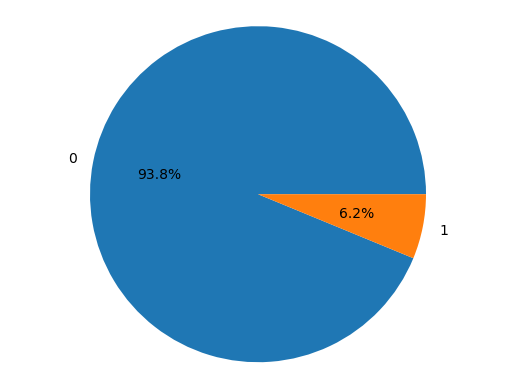

In [6]:
plt.pie(y_train.value_counts(), 
        labels=['0', '1'], 
        autopct='%0.1f%%')
plt.axis('equal')
plt.show()

In [7]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_ngram, y_train.values)
print(X_train_smote.shape, y_train_smote.shape)

(15704, 11661797) (15704,)


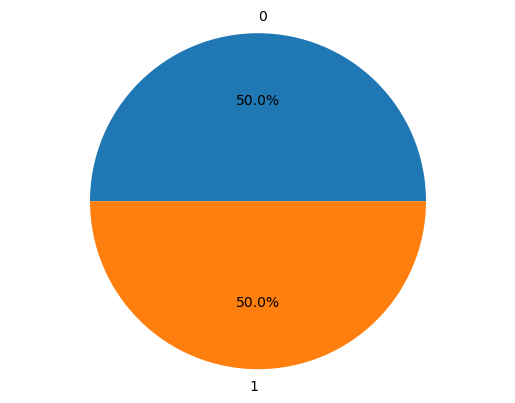

In [8]:
y_train_smote_series = pd.Series(y_train_smote)
plt.pie(y_train_smote_series.value_counts(), labels=['0', '1'], autopct='%0.1f%%')
plt.axis('equal')
plt.show()

<a id = "bow-fe"></a>

### 4.3. Bag of Words

In [10]:
# Creating a copy of the X datasets
X_train_bow = X_train.copy()
X_val_bow = X_val.copy()
# Creating a copy of the y datasets
y_train_bow = y_train.copy()
y_val_bow = y_val.copy()

In [11]:
# Create an instance of CountVectorizer with binary=True
bow = CountVectorizer(binary=True)

# Transform the text data in X_train_bow to BoW (Bag-of-Words) representation
X_train_bow = bow.fit_transform(X_train_bow["comments_and_desc"])

# Convert y_train_bow to a numpy array
y_train_BoW = np.array(y_train_bow)

# Transform the preprocessed text in X_val_bow to bag-of-words representation
X_val_bow = bow.transform(X_val_bow["comments_and_desc"])

# Convert y_val_bow to a NumPy array
y_val_bow = np.array(y_val_bow)

In [12]:
smote = SMOTE()
X_train_smote_bow, y_train_smote_bow = smote.fit_resample(X_train_bow, y_train_bow.values)
print(X_train_smote_bow.shape, y_train_smote_bow.shape)

(15704, 143573) (15704,)


<a id = "glove-fe"></a>

### 4.4. GloVe Embeddings

In [13]:
# Creating a copy of the X datasets
X_train_ge = X_train.copy()
X_val_ge = X_val.copy()
# Creating a copy of the y datasets
y_train_ge = y_train.copy()
y_val_ge = y_val.copy()

In [14]:
model = api.load("glove-wiki-gigaword-300")

In [15]:
def apply_glove_embeddings(text):
    words = text.split()
    embeddings = [model[word] if word in model else np.zeros(model.vector_size)
                  for word in words]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(model.vector_size)

In [16]:
X_train_ge['comments_and_desc'] = X_train_ge['comments_and_desc'].astype(str)
X_train_ge['comments_and_desc_glove_embeddings'] = X_train_ge['comments_and_desc'].apply(apply_glove_embeddings)

In [17]:
X_val_ge['comments_and_desc'] = X_val_ge['comments_and_desc'].astype(str)
X_val_ge['comments_and_desc_glove_embeddings'] = X_val_ge['comments_and_desc'].apply(apply_glove_embeddings)

In [36]:
smote = SMOTE()
X_train_ge_resampled, y_train_ge_resampled = smote.fit_resample(np.vstack(X_train_ge['comments_and_desc_glove_embeddings']), y_train_ge.values)
print(X_train_ge_resampled.shape, y_train_ge_resampled.shape)

(15704, 300) (15704,)


<div class="alert alert-block alert-success"> <a id = "classification-models"></a>

## 5. Classifiation Models

- [5.1. Logistic Regression](#lr-cm)

    - [TF-IDF](#tfidf-lr)
    
    - [BoW](#bow-lr)
    
    - [GloVe Embeddings](#ge-lr)

- [5.2. Naive Bays](#nb-cm)

    - [TF-IDF](#tfidf-nb)

    - [BoW](#bow-nb)

    - [GloVe Embeddings](#ge-nb)
    
- [5.3. Random Forest](#rf-cm)

    - [TF-IDF](#tfidf-rf)
        
    - [BoW](#bow-rf)

    - [GloVe Embeddings](#ge-rf)
    
- [5.4. KNN](#knn-cm)

    - [TF-IDF](#tfidf-knn)

    - [BoW](#bow-knn)
    
    - [GloVe Embeddings](#ge-knn)
    
- [5.5. Gradient Boosting](#gb-cm)

    - [TF-IDF](#tfidf-gb)

    - [BoW](#bow-gb)
    
    - [GloVe Embeddings](#ge-gb)
    
- [5.6. Results](#rs-cm)    

[Back to TOC](#toc)

#### When we use Class weights
We have 7,862 instances of class 0 and 521 instances of class 1. The weight for class 0 (majority class) will be set to 1 since it is the majority class. To calculate the weight for class 1 (minority class), you can use the formula:

weight_1 = total_samples / (num_samples_class1 * (num_classes - 1))

where total_samples is the total number of instances in the dataset, num_samples_class1 is the number of instances in class 1, and num_classes is the total number of classes (which is 2 in this case).

Let's calculate the weight for class 1:

weight_1 = (7862 + 521) / (521 * (2 - 1))
        = 8383 / 521
        ≈ 16.08

Therefore, the class weights for your imbalanced dataset are approximately:
- Class 0: 1.0
- Class 1: 16.08

These weights can be used in your machine learning model to assign higher importance to the minority class (class 1) during training, helping to address the class imbalance and potentially improving the model's performance on the minority class.

<a id = "lr-cm"></a>

### 5.1. Logistic Regression

In [178]:
# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression()

<a id = "tfidf-lr"></a>

### `TF-IDF`

#### Without SMOTE

In [179]:
# Fit the classifier on the training data
logistic_classifier.fit(X_train_ngram, y_train)

# Reuse the trained vectorizer to transform the validation data
X_val_ngram = train_ngram.transform(X_val["comments_and_desc"])

# Make predictions on the validation data
y_val_pred_lr_tfidf = logistic_classifier.predict(X_val_ngram)

# Calculate the classification report
print(classification_report(y_val, y_val_pred_lr_tfidf))

# Calculate the classification report
print(confusion_matrix(y_val, y_val_pred_lr_tfidf))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7551
           1       1.00      0.00      0.00       472

    accuracy                           0.94      8023
   macro avg       0.97      0.50      0.49      8023
weighted avg       0.94      0.94      0.91      8023

[[7551    0]
 [ 471    1]]


#### With SMOTE

In [29]:
# Initialize the logistic regression classifier
logistic_classifier = LogisticRegression()

# Fit the classifier on the SMOTE-resampled training data
logistic_classifier.fit(X_train_smote, y_train_smote)

# Reuse the trained vectorizer to transform the validation data
X_val_ngram = train_ngram.transform(X_val["comments_and_desc"])

# Make predictions on the validation data
y_val_pred_lr_tfidf = logistic_classifier.predict(X_val_ngram)

# Print the classification report
print(classification_report(y_val, y_val_pred_lr_tfidf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7551
           1       0.69      0.28      0.40       472

    accuracy                           0.95      8023
   macro avg       0.82      0.64      0.69      8023
weighted avg       0.94      0.95      0.94      8023



In [30]:
# Print the confusion matrix
print(confusion_matrix(y_val, y_val_pred_lr_tfidf))

[[7491   60]
 [ 338  134]]


<a id = "bow-lr"></a>

### `BoW`

#### Without SMOTE

In [15]:
# Fit the classifier on the training data
logistic_classifier.fit(X_train_bow, y_train_bow)

# Make predictions on the validation data
y_val_pred_bow = logistic_classifier.predict(X_val_bow)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
print(classification_report(y_val_bow, y_val_pred_bow))
print(confusion_matrix(y_val, y_val_pred_bow))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7551
           1       0.48      0.18      0.27       472

    accuracy                           0.94      8023
   macro avg       0.72      0.59      0.62      8023
weighted avg       0.92      0.94      0.93      8023

[[7458   93]
 [ 385   87]]


#### With SMOTE

In [18]:
# Fit the classifier on the training data
logistic_classifier.fit(X_train_smote_bow, y_train_smote_bow)

# Make predictions on the validation data
y_val_pred_bow_smote = logistic_classifier.predict(X_val_bow)

# Print the Classifcation report 
print(classification_report(y_val_bow, y_val_pred_bow_smote))
# Print the confusion matrix
print(confusion_matrix(y_val, y_val_pred_bow_smote))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7551
           1       0.20      0.32      0.25       472

    accuracy                           0.89      8023
   macro avg       0.58      0.62      0.59      8023
weighted avg       0.91      0.89      0.90      8023

[[6952  599]
 [ 319  153]]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<a id = "ge-lr"></a>

### `GloVe Embeddings`

#### Without SMOTE

In [26]:
# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression()

# Fit the classifier on the training data
logistic_classifier.fit(X_train_ge['comments_and_desc_glove_embeddings'].tolist(), y_train_ge)

# Make predictions on the validation data
y_val_pred_lr_glove = logistic_classifier.predict(X_val_ge['comments_and_desc_glove_embeddings'].tolist())

# Calculate the classification report
print(classification_report(y_val_ge, y_val_pred_lr_glove))

# Calculate the confusion matrix
print(confusion_matrix(y_val_ge, y_val_pred_lr_glove))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7551
           1       0.00      0.00      0.00       472

    accuracy                           0.94      8023
   macro avg       0.47      0.50      0.48      8023
weighted avg       0.89      0.94      0.91      8023

[[7551    0]
 [ 472    0]]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### With SMOTE

In [37]:
# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression()

# Fit the classifier on the SMOTE-resampled training data
logistic_classifier.fit(X_train_ge_resampled.tolist(), y_train_ge_resampled)

# Make predictions on the validation data
y_val_pred_lr_glove_smote = logistic_classifier.predict(X_val_ge['comments_and_desc_glove_embeddings'].tolist())

# Calculate the classification report
print(classification_report(y_val_ge, y_val_pred_lr_glove_smote))

# Calculate the confusion matrix
print(confusion_matrix(y_val_ge, y_val_pred_lr_glove_smote))

              precision    recall  f1-score   support

           0       0.96      0.66      0.78      7551
           1       0.10      0.58      0.16       472

    accuracy                           0.65      8023
   macro avg       0.53      0.62      0.47      8023
weighted avg       0.91      0.65      0.74      8023

[[4953 2598]
 [ 196  276]]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<a id = "nb-cm"></a>

### 5.2. Naive Bayes - Usar class weights

<a id = "tfidf-nb"></a>

### `TF-IDF`

#### Without Class Weights

In [34]:
# Create a TF-IDF vectorizer and fit it on the training data
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, ngram_range=(1, 3))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train["comments_and_desc"])

# Transform the validation data using the same vectorizer
X_val_tfidf = tfidf_vectorizer.transform(X_val["comments_and_desc"])

# Train the classifier with the TF-IDF features
nb_classifier.fit(X_train_tfidf, y_train_tfidf["unlisted"])

# Make predictions on the validation set
y_pred_nb_tfidf = nb_classifier.predict(X_val_tfidf)

# Calculate and print the classification report
print(classification_report(y_val, y_pred_nb_tfidf))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7551
           1       0.00      0.00      0.00       472

    accuracy                           0.94      8023
   macro avg       0.47      0.50      0.48      8023
weighted avg       0.89      0.94      0.91      8023



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
print(confusion_matrix(y_val, y_pred_nb_tfidf))

[[7551    0]
 [ 472    0]]


#### With Class Weights

In [9]:
# Create an instance of the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Set the class weights
class_weights = {0: 1.0, 1: 16.08}

# Create a TF-IDF vectorizer and fit it on the training data
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, ngram_range=(1, 3))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train["comments_and_desc"])

# Transform the validation data using the same vectorizer
X_val_tfidf = tfidf_vectorizer.transform(X_val["comments_and_desc"])

# Train the classifier with the weighted TF-IDF features
nb_classifier.fit(X_train_tfidf, y_train_tfidf["unlisted"], sample_weight=[class_weights[y] for y in y_train_tfidf["unlisted"]])

# Make predictions on the validation set
y_pred_nb_tfidf_w = nb_classifier.predict(X_val_tfidf)

#print(classification_report(y_val, y_val_pred_lr_tfidf))
report = classification_report(y_val, y_pred_nb_tfidf_w)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      7551
           1       0.60      0.71      0.65       472

    accuracy                           0.96      8023
   macro avg       0.79      0.84      0.81      8023
weighted avg       0.96      0.96      0.96      8023



In [10]:
print(confusion_matrix(y_val, y_pred_nb_tfidf_w))

[[7331  220]
 [ 136  336]]


<a id = "bow-nb"></a>

### `BoW`

#### Without Class Weights

In [182]:
# Create a Naive Bayes classifier
naive_bayes = MultinomialNB()

# Train the classifier
naive_bayes.fit(X_train_bow, y_train_bow)

# Predict on the validation data
y_val_pred_nb = naive_bayes.predict(X_val_bow)

# Check the classification report
print(classification_report(y_val, y_val_pred_nb))

# Check the confusion matrix
print(confusion_matrix(y_val, y_val_pred_nb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7551
           1       0.54      0.01      0.03       472

    accuracy                           0.94      8023
   macro avg       0.74      0.51      0.50      8023
weighted avg       0.92      0.94      0.91      8023

[[7545    6]
 [ 465    7]]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We tried with the class weights, but the results were worse.

#### With Class Weights

In [47]:
# Define the weights
weights = [1.0, 16.08]

# Create a Naive Bayes classifier with class weights
naive_bayes = MultinomialNB(class_prior=weights)

# Train the classifier
naive_bayes.fit(X_train_bow, y_train_bow)

# Predict on the validation data
y_val_pred_nb = naive_bayes.predict(X_val_bow)

# Check the classification report
print(classification_report(y_val, y_val_pred_nb))

# Check the confusion matrix
print(confusion_matrix(y_val, y_val_pred_nb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7551
           1       0.40      0.03      0.05       472

    accuracy                           0.94      8023
   macro avg       0.67      0.51      0.51      8023
weighted avg       0.91      0.94      0.92      8023

[[7533   18]
 [ 460   12]]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<a id = "ge-nb"></a>

### `GloVe Embeddings`

#### Without Class Weights

In [29]:
# Create a Gaussian Naive Bayes classifier
gaussian_nb = GaussianNB()

# Fit the classifier on the training data
gaussian_nb.fit(X_train_ge['comments_and_desc_glove_embeddings'].tolist(), y_train_ge)

# Make predictions on the validation data
y_val_pred_nb_glove = gaussian_nb.predict(X_val_ge['comments_and_desc_glove_embeddings'].tolist())

# Calculate the classification report
print(classification_report(y_val_ge, y_val_pred_nb_glove))

# Calculate the confusion matrix
print(confusion_matrix(y_val_ge, y_val_pred_nb_glove))

              precision    recall  f1-score   support

           0       0.95      0.66      0.78      7551
           1       0.08      0.47      0.14       472

    accuracy                           0.65      8023
   macro avg       0.52      0.56      0.46      8023
weighted avg       0.90      0.65      0.74      8023

[[4989 2562]
 [ 251  221]]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### With Class Weights

<a id = "rf-cm"></a>

### 5.3. Random Forest - Usar class weights

<a id = "tfidf-rf"></a>

### `TF-IDF`

#### Without Class Weights

In [36]:
# Create an instance of the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier with the TF-IDF features
rf_classifier.fit(X_train_ngram, y_train_tfidf["unlisted"])

# Make predictions on the validation set
y_pred_rf_tfidf = rf_classifier.predict(X_val_ngram)

# Calculate and print the classification report
print(classification_report(y_val, y_pred_rf_tfidf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7551
           1       0.81      0.11      0.20       472

    accuracy                           0.95      8023
   macro avg       0.88      0.56      0.59      8023
weighted avg       0.94      0.95      0.93      8023



In [37]:
print(confusion_matrix(y_val, y_pred_rf_tfidf))

[[7538   13]
 [ 418   54]]


#### With Class Weights

In [38]:
# Create an instance of the Random Forest classifier
rf_classifier = RandomForestClassifier(class_weight={0: 1.0, 1: 16.08})

# Train the classifier with the TF-IDF features
rf_classifier.fit(X_train_ngram, y_train_tfidf["unlisted"])

# Make predictions on the validation set
y_pred_rf_tfidf_w = rf_classifier.predict(X_val_ngram)

# Print the classification report
print(classification_report(y_val, y_pred_rf_tfidf_w))

# Calculate and plot the confusion matrix
print(confusion_matrix(y_val, y_pred_rf_tfidf_w))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7551
           1       0.88      0.03      0.06       472

    accuracy                           0.94      8023
   macro avg       0.91      0.51      0.51      8023
weighted avg       0.94      0.94      0.92      8023

[[7549    2]
 [ 458   14]]


<a id = "bow-rf"></a>

### `BoW`

#### Without Class Weights

In [25]:
# Create an instance of the Random Forest classifier
random_forest = RandomForestClassifier()

# Fit the classifier on the training data
random_forest.fit(X_train_bow, y_train_bow)

# Make predictions on the validation data
y_val_pred_rf = random_forest.predict(X_val_bow)

# Print the Classification report
print(classification_report(y_val_bow, y_val_pred_rf))

# Print the confusion matrix
print(confusion_matrix(y_val, y_val_pred_rf))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12268\2352798503.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train_bow, y_train_bow)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7551
           1       1.00      0.02      0.05       472

    accuracy                           0.94      8023
   macro avg       0.97      0.51      0.51      8023
weighted avg       0.95      0.94      0.92      8023

[[7551    0]
 [ 461   11]]


#### With Class Weights

In [23]:
# Create an instance of the Random Forest classifier
random_forest = RandomForestClassifier(class_weight = {0: 1.0, 1: 16.08})

# Fit the classifier on the training data
random_forest.fit(X_train_bow, y_train_bow)

# Make predictions on the validation data
y_val_pred_rf = random_forest.predict(X_val_bow)

# Print the Classifcation report 
print(classification_report(y_val_bow, y_val_pred_rf))
# Print the confusion matrix
print(confusion_matrix(y_val, y_val_pred_rf))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3480\1271431851.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train_bow, y_train_bow)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7551
           1       1.00      0.02      0.05       472

    accuracy                           0.94      8023
   macro avg       0.97      0.51      0.51      8023
weighted avg       0.95      0.94      0.92      8023

[[7551    0]
 [ 461   11]]


<a id = "ge-rf"></a>

### `GloVe Embeddings`

#### Without Class Weights

In [30]:
# Create a Random Forest classifier
random_forest = RandomForestClassifier()

# Fit the classifier on the training data
random_forest.fit(X_train_ge['comments_and_desc_glove_embeddings'].tolist(), y_train_ge)

# Make predictions on the validation data
y_val_pred_rf_glove = random_forest.predict(X_val_ge['comments_and_desc_glove_embeddings'].tolist())

# Calculate the classification report
print(classification_report(y_val_ge, y_val_pred_rf_glove))

# Calculate the confusion matrix
print(confusion_matrix(y_val_ge, y_val_pred_rf_glove))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12268\1190085799.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train_ge['comments_and_desc_glove_embeddings'].tolist(), y_train_ge)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7551
           1       1.00      0.00      0.01       472

    accuracy                           0.94      8023
   macro avg       0.97      0.50      0.49      8023
weighted avg       0.94      0.94      0.91      8023

[[7551    0]
 [ 470    2]]


#### With Class Weights

In [32]:
# Create an instance of the Random Forest classifier
random_forest = RandomForestClassifier(class_weight={0: 1.0, 1: 16.08})

# Fit the classifier on the training data
random_forest.fit(X_train_ge['comments_and_desc_glove_embeddings'].tolist(), y_train_ge)

# Make predictions on the validation data
y_val_pred_rf_glove = random_forest.predict(X_val_ge['comments_and_desc_glove_embeddings'].tolist())

# Calculate the classification report
print(classification_report(y_val_ge, y_val_pred_rf_glove))

# Calculate the confusion matrix
print(confusion_matrix(y_val_ge, y_val_pred_rf_glove))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12268\15825015.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train_ge['comments_and_desc_glove_embeddings'].tolist(), y_train_ge)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7551
           1       0.00      0.00      0.00       472

    accuracy                           0.94      8023
   macro avg       0.47      0.50      0.48      8023
weighted avg       0.89      0.94      0.91      8023

[[7551    0]
 [ 472    0]]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a id = "knn-cm"></a>

### 5.4. KNN - Usar SMOTE

<a id = "tfidf-knn"></a>

### `TF-IDF`

#### Without SMOTE

In [ ]:
# Create an instance of the k-NN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 15]}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train_ngram, y_train)

# Get the best number of neighbors
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Create a new k-NN classifier with the best number of neighbors
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)

# Fit the classifier on the training data
best_knn.fit(X_train_ngram, y_train)

# Make predictions on the validation data
y_val_pred_knn = best_knn.predict(X_val_ngram)

# Calculate and print the classification report
print(classification_report(y_val, y_val_pred_knn))

# Calculate and plot the confusion matrix
print(confusion_matrix(y_val, y_val_pred_knn))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#### With SMOTE

In [ ]:
# Define the parameter grid for grid search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 15]}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)

# Fit the grid search on the SMOTE-transformed training data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best number of neighbors
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Create a new k-NN classifier with the best number of neighbors
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)

# Fit the classifier on the SMOTE-transformed training data
best_knn.fit(X_train_smote, y_train_smote)

# Make predictions on the validation data
y_val_pred_knn_smote = best_knn.predict(X_val_ngram)

# Calculate and print the classification report
print(classification_report(y_val, y_val_pred_knn_smote))

# Calculate and print the confusion matrix
print(confusion_matrix(y_val, y_val_pred_knn_smote))

<a id = "bow-knn"></a>

### `BoW`

In [22]:
# Create an instance of the k-NN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11,15]}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train_bow, y_train_bow)

# Get the best number of neighbors
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Create a new k-NN classifier with the best number of neighbors
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)

# Fit the classifier on the training data
best_knn.fit(X_train_bow, y_train_bow)

# Make predictions on the validation data
y_val_pred_knn = best_knn.predict(X_val_bow)

# Calculate and print the classification report
print(classification_report(y_val, y_val_pred_knn))

# Calculate and plot the confusion matrix
print(confusion_matrix(y_val, y_val_pred_knn))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7551
           1       1.00      0.00      0.00       472

    accuracy                           0.94      8023
   macro avg       0.97      0.50      0.49      8023
weighted avg       0.94      0.94      0.91      8023

[[7551    0]
 [ 471    1]]


<a id = "ge-knn"></a>

### `GloVe Embeddings`

#### Without SMOTE

In [34]:
# Create an instance of the k-NN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 15]}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train_ge['comments_and_desc_glove_embeddings'].tolist(), y_train_ge)

# Get the best number of neighbors
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Create a new k-NN classifier with the best number of neighbors
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)

# Fit the classifier on the training data
best_knn.fit(X_train_ge['comments_and_desc_glove_embeddings'].tolist(), y_train_ge)

# Make predictions on the validation data
y_val_pred_knn = best_knn.predict(X_val_ge['comments_and_desc_glove_embeddings'].tolist())

# Calculate and print the classification report
print(classification_report(y_val_ge, y_val_pred_knn))

# Calculate and print the confusion matrix
print(confusion_matrix(y_val_ge, y_val_pred_knn))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7551
           1       0.60      0.02      0.04       472

    accuracy                           0.94      8023
   macro avg       0.77      0.51      0.50      8023
weighted avg       0.92      0.94      0.91      8023

[[7545    6]
 [ 463    9]]


In [38]:
# Create an instance of the k-NN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 15]}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)

# Fit the grid search on the resampled training data
grid_search.fit(X_train_ge_resampled, y_train_ge_resampled)

# Get the best number of neighbors
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Create a new k-NN classifier with the best number of neighbors
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)

# Fit the classifier on the resampled training data
best_knn.fit(X_train_ge_resampled, y_train_ge_resampled)

# Make predictions on the validation data
y_val_pred_knn = best_knn.predict(X_val_ge['comments_and_desc_glove_embeddings'].tolist())

# Calculate and print the classification report
print(classification_report(y_val_ge, y_val_pred_knn))

# Calculate and print the confusion matrix
print(confusion_matrix(y_val_ge, y_val_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.65      0.78      7551
           1       0.11      0.71      0.19       472

    accuracy                           0.65      8023
   macro avg       0.54      0.68      0.49      8023
weighted avg       0.92      0.65      0.74      8023

[[4901 2650]
 [ 136  336]]


<a id = "gb-cm"></a>

### 5.5. Gradient Boosting

<a id = "tfidf-gb"></a>

### `TF-IDF`

#### Without SMOTE

In [175]:
# Create an instance of the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()

# Fit the classifier on the training data with TF-IDF features
gradient_boosting.fit(X_train_ngram, y_train)

# Make predictions on the validation data with TF-IDF features
y_val_pred_gb = gradient_boosting.predict(X_val_ngram)

# Calculate and print the classification report
print(classification_report(y_val, y_val_pred_gb))

# Calculate and print the confusion matrix
print(confusion_matrix(y_val, y_val_pred_gb))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

#### With SMOTE

In [ ]:
# Create an instance of the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()

# Fit the classifier on the SMOTE-enhanced training data with TF-IDF features
gradient_boosting.fit(X_train_smote, y_train_smote)

# Make predictions on the validation data with TF-IDF features
y_val_pred_gb = gradient_boosting.predict(X_val_ngram)

# Calculate and print the classification report
print(classification_report(y_val, y_val_pred_gb))

# Calculate and print the confusion matrix
print(confusion_matrix(y_val, y_val_pred_gb))

<a id = "bow-gb"></a>

### `BoW`

#### Without SMOTE

In [21]:
# Create an instance of the Gradient Boosting classifier 
gradient_boosting = GradientBoostingClassifier()

# Fit the classifier on the training data
gradient_boosting.fit(X_train_bow, y_train_bow)

# Make predictions on the validation data
y_val_pred_gb = gradient_boosting.predict(X_val_bow)

# Calculate and print the classification report
print(classification_report(y_val, y_val_pred_gb))

# Calculate and plot the confusion matrix
print(confusion_matrix(y_val, y_val_pred_gb))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7551
           1       0.77      0.02      0.04       472

    accuracy                           0.94      8023
   macro avg       0.86      0.51      0.51      8023
weighted avg       0.93      0.94      0.92      8023

[[7548    3]
 [ 462   10]]


#### With SMOTE

In [19]:
# Create an instance of the Gradient Boosting classifier 
gradient_boosting = GradientBoostingClassifier()

# Fit the classifier on the training data
gradient_boosting.fit(X_train_smote_bow, y_train_smote_bow)

# Make predictions on the validation data
y_val_pred_gb = gradient_boosting.predict(X_val_bow)

# Calculate and print the classification report
print(classification_report(y_val, y_val_pred_gb))

# Calculate and plot the confusion matrix
print(confusion_matrix(y_val, y_val_pred_gb))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7551
           1       0.14      0.29      0.19       472

    accuracy                           0.86      8023
   macro avg       0.55      0.59      0.56      8023
weighted avg       0.91      0.86      0.88      8023

[[6743  808]
 [ 335  137]]


<a id = "ge-gb"></a>

### `GloVe Embeddings`

#### Without SMOTE

In [33]:
# Create an instance of the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()

# Fit the classifier on the training data
gradient_boosting.fit(X_train_ge['comments_and_desc_glove_embeddings'].tolist(), y_train_ge)

# Make predictions on the validation data
y_val_pred_gb_glove = gradient_boosting.predict(X_val_ge['comments_and_desc_glove_embeddings'].tolist())

# Calculate the classification report
print(classification_report(y_val_ge, y_val_pred_gb_glove))

# Calculate the confusion matrix
print(confusion_matrix(y_val_ge, y_val_pred_gb_glove))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7551
           1       0.22      0.02      0.04       472

    accuracy                           0.94      8023
   macro avg       0.58      0.51      0.50      8023
weighted avg       0.90      0.94      0.91      8023

[[7519   32]
 [ 463    9]]


#### With SMOTE

In [39]:
# Create an instance of the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()

# Fit the classifier on the oversampled training data
gradient_boosting.fit(X_train_ge_resampled.tolist(), y_train_ge_resampled)

# Make predictions on the validation data
y_val_pred_gb_glove_smote = gradient_boosting.predict(X_val_ge['comments_and_desc_glove_embeddings'].tolist())

# Calculate the classification report
print(classification_report(y_val_ge, y_val_pred_gb_glove_smote))

# Calculate the confusion matrix
print(confusion_matrix(y_val_ge, y_val_pred_gb_glove_smote))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      7551
           1       0.11      0.36      0.17       472

    accuracy                           0.79      8023
   macro avg       0.53      0.59      0.52      8023
weighted avg       0.90      0.79      0.84      8023

[[6174 1377]
 [ 303  169]]


<a id = "rs-cm"></a>

### 5.6. Results

| Model                | Feature Engineering  | Balanced?    | Accuracy | F1-Score | Precision | Recall   |
|----------------------|--------------------- |--------------|----------|----------|-----------|----------|
| Logistic Regression  |         TF-IDF       |      No      |   0.94   |   0.91   |   0.94    |   0.94   |
| Logistic Regression  |         TF-IDF       |  Yes - SMOTE |   0.95   |   0.94   |   0.94    |   0.95   |
| Logistic Regression  |         BoW          |      No      |   0.94   |   0.93   |   0.92    |   0.94   |
| Logistic Regression  |         BoW          |  Yes - SMOTE |   0.89   |   0.90   |   0.91    |   0.89   |
| Logistic Regression  |        GloVe         |      No      |   0.94   |   0.91   |   0.89    |   0.94   |
| Logistic Regression  |        GloVe         |  Yes - SMOTE |   0.65   |   0.74   |   0.91    |   0.65   |
| Naïve Bayes          |         TF-IDF       |      No      |   0.94   |   0.91   |   0.89    |   0.94   |
| Naïve Bayes          |         TF-IDF       |Yes - Weights |   0.96   |   0.96   |   0.96    |   0.96   |
| Naïve Bayes          |         BoW          |      No      |   0.94   |   0.91   |   0.92    |   0.94   |
| Naïve Bayes          |         BoW          |Yes - Weights |   0.94   |   0.92   |   0.91    |   0.94   |
| Naïve Bayes          |        GloVe         |      No      |   0.65   |   0.74   |   0.90    |   0.65   |
| Random Forest        |         TF-IDF       |      No      |   0.95   |   0.93   |   0.94    |   0.95   |
| Random Forest        |         TF-IDF       |Yes - Weights |   0.94   |   0.92   |   0.94    |   0.94   |
| Random Forest        |         BoW          |      No      |   0.94   |   0.92   |   0.95    |   0.94   |
| Random Forest        |         BoW          |Yes - Weights |   0.94   |   0.92   |   0.95    |   0.94   |
| Random Forest        |        GloVe         |      No      |   0.94   |   0.91   |   0.94    |   0.94   |
| Random Forest        |        GloVe         |Yes - Weights |   0.94   |   0.91   |   0.89    |   0.94   |
| KNN                  |         BoW          |      No      |   0.94   |   0.91   |   0.94    |   0.94   |
| KNN                  |        GloVe         |      No      |   0.94   |   0.91   |   0.92    |   0.94   |
| KNN                  |        GloVe         |  Yes - SMOTE |   0.65   |   0.74   |   0.92    |   0.65   |
| Gradient Boosting    |         BoW          |      No      |   0.94   |   0.92   |   0.93    |   0.94   |
| Gradient Boosting    |         BoW          |  Yes - SMOTE |   0.86   |   0.88   |   0.91    |   0.86   |
| Gradient Boosting    |        GloVe         |      No      |   0.94   |   0.91   |   0.90    |   0.94   |
| Gradient Boosting    |        GloVe         |  Yes - SMOTE |   0.74   |   0.84   |   0.90    |   0.79   |

<div class="alert alert-block alert-success"> <a id = "evaluation"></a>

## 6. Evaluation

In [63]:
# Reading the test datasets
test = pd.read_excel('Project Corpora/test.xlsx')
test_reviews = pd.read_excel('Project Corpora/test_reviews.xlsx')

In [64]:
test

,index,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,4,Charming Apartment Close to the Bay of Cascais...,:)
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...
...,...,...,...
1384,1385,O melhor ponto de partida para descobrir Lisbo...,I work in Hospitality and I love traveling._x0...
1385,1386,Casa de Baixo is a cozy and comfortable apartm...,"Visit us, stay with us and discover the most b..."
1386,1387,Beautiful and peaceful apartment with a superb...,"Nice, well travelled, educated, cult, cosmopol..."
1387,1388,The apartment in Lisbon has capacity for 2 pe...,We are Feels Like Home Holiday Rentals.\nA com...


In [6]:
test_reviews

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...
...,...,...
80872,1387,We had a great time in the apartment. The apar...
80873,1387,Excelente apartamento! Ótimo anfitrião! Aparta...
80874,1387,"Nice apartment, spacius, well equipt and clean..."
80875,1388,Unfortunately not a pleasant experience. The h...


In [67]:
test = rename_column(test, 'index', 'house_nr')
test_reviews = rename_column(test_reviews, 'index', 'house_nr')

Check languages for each comment and description:

In [73]:
# Apply the function to the "description" column
test["description_lang"] = test["description"].apply(detect_language)

In [74]:
# Apply the function to the "comments" column
test_reviews["comments_lang"] = test_reviews["comments"].apply(detect_language)

In [75]:
test

,house_nr,description,host_about,description_lang
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...,en
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ...",en
3,4,Charming Apartment Close to the Bay of Cascais...,:),en
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...,pt
...,...,...,...,...
1384,1385,O melhor ponto de partida para descobrir Lisbo...,I work in Hospitality and I love traveling._x0...,pt
1385,1386,Casa de Baixo is a cozy and comfortable apartm...,"Visit us, stay with us and discover the most b...",en
1386,1387,Beautiful and peaceful apartment with a superb...,"Nice, well travelled, educated, cult, cosmopol...",en
1387,1388,The apartment in Lisbon has capacity for 2 pe...,We are Feels Like Home Holiday Rentals.\nA com...,en


In [76]:
test_reviews

,house_nr,comments,comments_lang
0,1,Thank you very much Antonio ! All has been per...,en
1,1,Very nice appartment in the old town of Lissab...,en
2,1,When travelling we're looking for kids friendl...,en
3,1,We've been in Lisbon in march 2013 (3 adults a...,en
4,1,Our host Antonio was very helpful with informa...,en
...,...,...,...
80872,1387,We had a great time in the apartment. The apar...,en
80873,1387,Excelente apartamento! Ótimo anfitrião! Aparta...,pt
80874,1387,"Nice apartment, spacius, well equipt and clean...",en
80875,1388,Unfortunately not a pleasant experience. The h...,en


In [82]:
test_reviews[test_reviews['comments'] == 'commentless']

,house_nr,comments,comments_lang
34245,549,commentless,en


In [81]:
test_reviews.at[34245, 'comments'] = 'commentless'
test_reviews.at[34245, 'comments_lang'] = 'en'

Merge the datasets

In [83]:
# Combining the two dataframes
combined_test = pd.merge(test, test_reviews, on='house_nr', how='left')
#combined_test.set_index("index", inplace=True)
combined_test_original = combined_test.copy()

In [93]:
combined_test

,house_nr,description,host_about,description_lang,comments,comments_lang
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,Thank you very much Antonio ! All has been per...,en
1,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,Very nice appartment in the old town of Lissab...,en
2,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,When travelling we're looking for kids friendl...,en
3,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,We've been in Lisbon in march 2013 (3 adults a...,en
4,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,Our host Antonio was very helpful with informa...,en
...,...,...,...,...,...,...
81311,1387,Beautiful and peaceful apartment with a superb...,"Nice, well travelled, educated, cult, cosmopol...",en,Excelente apartamento! Ótimo anfitrião! Aparta...,pt
81312,1387,Beautiful and peaceful apartment with a superb...,"Nice, well travelled, educated, cult, cosmopol...",en,"Nice apartment, spacius, well equipt and clean...",en
81313,1388,The apartment in Lisbon has capacity for 2 pe...,We are Feels Like Home Holiday Rentals.\nA com...,en,Unfortunately not a pleasant experience. The h...,en
81314,1388,The apartment in Lisbon has capacity for 2 pe...,We are Feels Like Home Holiday Rentals.\nA com...,en,Hi everybody!<br/>If you want to live with coc...,en


Fill na

In [92]:
combined_test = replace_nan_comments(combined_test_original, "comments")

In [94]:
# Deleting the host_about feature
combined_test.drop("host_about", axis=1, inplace=True)

# Filtering the test_reviews dataset to only contain observations with strings - remove the observation that is a zero 0
combined_test = combined_test.loc[combined_test['comments'].apply(lambda x: isinstance(x, str))]

In [95]:
combined_test

,house_nr,description,description_lang,comments,comments_lang
0,1,<b>The space</b><br />Apartment located in the...,en,Thank you very much Antonio ! All has been per...,en
1,1,<b>The space</b><br />Apartment located in the...,en,Very nice appartment in the old town of Lissab...,en
2,1,<b>The space</b><br />Apartment located in the...,en,When travelling we're looking for kids friendl...,en
3,1,<b>The space</b><br />Apartment located in the...,en,We've been in Lisbon in march 2013 (3 adults a...,en
4,1,<b>The space</b><br />Apartment located in the...,en,Our host Antonio was very helpful with informa...,en
...,...,...,...,...,...
81311,1387,Beautiful and peaceful apartment with a superb...,en,Excelente apartamento! Ótimo anfitrião! Aparta...,pt
81312,1387,Beautiful and peaceful apartment with a superb...,en,"Nice apartment, spacius, well equipt and clean...",en
81313,1388,The apartment in Lisbon has capacity for 2 pe...,en,Unfortunately not a pleasant experience. The h...,en
81314,1388,The apartment in Lisbon has capacity for 2 pe...,en,Hi everybody!<br/>If you want to live with coc...,en


In [87]:
combined_test['comments_lang'].unique()


array(['en', 'fr', 'de', 'it', 'es', 'nl', 'pt', 'ca', 'ko', 'id', 'pl',
       'ro', 'af', 'zh-cn', 'ru', 'fi', 'tr', 'sv', 'Unknown', 'cs', 'so',
       'sk', 'tl', 'hu', 'lt', 'zh-tw', 'cy', 'ar', 'da', 'el', 'he',
       'bg', 'no', 'ja', 'vi', 'mk', 'hr', 'sw', 'uk', 'lv', 'sl', 'et',
       'sq'], dtype=object)

Emoji treatment

In [96]:
combined_test_without_emojis = convert_emojis_to_text(combined_test, 'comments', 'comments_lang')

In [97]:
combined_test_without_emojis_original = combined_test_without_emojis.copy()

Combine both datasets

In [98]:
# Create X_test dataframe with selected features
X_test = combined_test_without_emojis[['description', 'description_lang', 'comments', 'comments_lang', 'house_nr']]

In [101]:
X_test['comments_lang'].fillna('en', inplace=True)

X_test

C:\Users\Cláudia Rocha\AppData\Local\Temp\ipykernel_7548\2652746325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['comments_lang'].fillna('en', inplace=True)


,description,description_lang,comments,comments_lang,house_nr
0,<b>The space</b><br />Apartment located in the...,en,Thank you very much Antonio ! All has been per...,en,1
1,<b>The space</b><br />Apartment located in the...,en,Very nice appartment in the old town of Lissab...,en,1
2,<b>The space</b><br />Apartment located in the...,en,When travelling we're looking for kids friendl...,en,1
3,<b>The space</b><br />Apartment located in the...,en,We've been in Lisbon in march 2013 (3 adults a...,en,1
4,<b>The space</b><br />Apartment located in the...,en,Our host Antonio was very helpful with informa...,en,1
...,...,...,...,...,...
81311,Beautiful and peaceful apartment with a superb...,en,Excelente apartamento! Ótimo anfitrião! Aparta...,pt,1387
81312,Beautiful and peaceful apartment with a superb...,en,"Nice apartment, spacius, well equipt and clean...",en,1387
81313,The apartment in Lisbon has capacity for 2 pe...,en,Unfortunately not a pleasant experience. The h...,en,1388
81314,The apartment in Lisbon has capacity for 2 pe...,en,Hi everybody!<br/>If you want to live with coc...,en,1388


In [27]:
#X_test = X_test[X_test['comments_lang'] != 'Unknown']

In [102]:
x_test_cleaned = clean(X_test, "comments", "comments_lang", lang_dict, lemmatize=True, stemmer=False)

81316it [03:53, 348.50it/s]


In [103]:
x_test_description_cleaned = clean(X_test, "description", "description_lang", lang_dict, lemmatize=True, stemmer=False)

81316it [02:16, 594.04it/s]


In [104]:
X_test_cl = add_cleaned_features(X_test, x_test_cleaned, "cleaned_comment")
X_test_cl = add_cleaned_features(X_test, x_test_description_cleaned, "cleaned_description")

C:\Users\Cláudia Rocha\AppData\Local\Temp\ipykernel_7548\1014645861.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column_name] = cleaned_comments
C:\Users\Cláudia Rocha\AppData\Local\Temp\ipykernel_7548\1014645861.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column_name] = cleaned_comments


In [122]:
X_test_cl

,house_nr,all_comments,cleaned_description,comments_and_desc
0,1,thank much antonio exclamation perfect stay ap...,b space b apartment located historic center li...,thank much antonio exclamation perfect stay ap...
125,2,beautiful ight apartment residential area litt...,important response covid number property exten...,beautiful ight apartment residential area litt...
136,3,commentless,ight beautiful spacious four bedroom apartment...,commentless ight beautiful spacious four bedro...
137,4,claudia great host met u train station ing u a...,charming apartment close bay cascais number be...,claudia great host met u train station ing u a...
154,5,maison exactement comme photo tres propre drap...,procura uma feria perto praia casino outras at...,maison exactement comme photo tres propre drap...
...,...,...,...,...
80927,1385,commentless,melhor ponto partida descoir lisboa exclamatio...,commentless melhor ponto partida descoir lisbo...
80928,1386,bonnes prestations bien situe double vitrages ...,casa de baixo cozy comfortable apartment ideal...,bonnes prestations bien situe double vitrages ...
81265,1387,tiago simpatico disponivel apartamento limpo b...,beautiful peaceful apartment superb view minim...,tiago simpatico disponivel apartamento limpo b...
81313,1388,unfortunately pleasant experience humidity apa...,apartment lisbon capacity number people apartm...,unfortunately pleasant experience humidity apa...


In [106]:
# Remove unnecessary columns from the train dataset
X_test_cl.drop(["description","description_lang","comments","comments_lang"],axis=1,inplace=True)

C:\Users\Cláudia Rocha\AppData\Local\Temp\ipykernel_7548\3854958821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cl.drop(["description","description_lang","comments","comments_lang"],axis=1,inplace=True)


In [117]:
# Concatenate cleaned comments per house number
X_test_cl['all_comments'] = X_test_cl.groupby('house_nr')['cleaned_comment'].transform(lambda x: ' '.join(str(comment) for comment in x))

C:\Users\Cláudia Rocha\AppData\Local\Temp\ipykernel_7548\2482343085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cl['all_comments'] = X_test_cl.groupby('house_nr')['cleaned_comment'].transform(lambda x: ' '.join(str(comment) for comment in x))


In [115]:
X_test_cl['all_comments'] = X_test_cl.groupby('house_nr')['cleaned_comment'].apply(lambda x: ' '.join(str(comment) for comment in x))

C:\Users\Cláudia Rocha\AppData\Local\Temp\ipykernel_7548\2084881173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cl['all_comments'] = X_test_cl.groupby('house_nr')['cleaned_comment'].apply(lambda x: ' '.join(str(comment) for comment in x))


In [119]:
X_test_cl = X_test_cl[['house_nr', 'all_comments', 'cleaned_description']].drop_duplicates()

In [121]:
# Concatenate cleaned description to all_comments
X_test_cl['comments_and_desc'] = X_test_cl['all_comments'] + ' ' + X_test_cl['cleaned_description']


In [62]:
########## X_TRAIN DATASET


# Drop the duplicates
#X_test_cl = X_test_cl[['house_nr', 'comments_and_desc']].drop_duplicates()

# Drop rows with NaN values in 'comments_and_desc' column
#X_test_cl.dropna(subset=['comments_and_desc'], inplace=True)

KeyError: "['description', 'description_lang', 'comments', 'comments_lang'] not found in axis"

In [50]:
X_test[X_test['comments'] == 'commentless' ]

,Unnamed: 0,description,description_lang,comments,comments_lang,house_nr
34161,34417,The apartment is in a typical residential buil...,en,commentless,en,549


In [37]:
X_test[X_test['comments'] == 'commentless']

,Unnamed: 0,description,description_lang,comments,comments_lang,house_nr


In [49]:
X_test.at[34161, 'comments'] = 'commentless'
X_test.at[34161, 'comments_lang'] = 'en'

In [36]:
value = X_test.at[34161, 'comments']
value_type = type(value)
print(value_type)

<class 'str'>


In [57]:
X_test_cl

,Unnamed: 0,description,description_lang,comments,comments_lang,house_nr,cleaned_comment,cleaned_description
0,0,<b>The space</b><br />Apartment located in the...,en,Thank you very much Antonio ! All has been per...,en,1,thank much antonio exclamation perfect stay ap...,b space b apartment located historic center li...
1,1,<b>The space</b><br />Apartment located in the...,en,Very nice appartment in the old town of Lissab...,en,1,nice appartment old town lissabon quite centra...,b space b apartment located historic center li...
2,2,<b>The space</b><br />Apartment located in the...,en,When travelling we're looking for kids friendl...,en,1,travelling looking kid friendly place stay ant...,b space b apartment located historic center li...
3,3,<b>The space</b><br />Apartment located in the...,en,We've been in Lisbon in march 2013 (3 adults a...,en,1,lisbon march number number adult number child ...,b space b apartment located historic center li...
4,4,<b>The space</b><br />Apartment located in the...,en,Our host Antonio was very helpful with informa...,en,1,host antonio helpful information lissabon pick...,b space b apartment located historic center li...
...,...,...,...,...,...,...,...,...
80684,81310,Beautiful and peaceful apartment with a superb...,en,We had a great time in the apartment. The apar...,en,1387,great time apartment apartment located great p...,beautiful peaceful apartment superb view minim...
80685,81311,Beautiful and peaceful apartment with a superb...,en,Excelente apartamento! Ótimo anfitrião! Aparta...,pt,1387,excelente apartamento exclamation otimo anfitr...,beautiful peaceful apartment superb view minim...
80686,81312,Beautiful and peaceful apartment with a superb...,en,"Nice apartment, spacius, well equipt and clean...",en,1387,nice apartment spacius well equipt clean joann...,beautiful peaceful apartment superb view minim...
80687,81313,The apartment in Lisbon has capacity for 2 pe...,en,Unfortunately not a pleasant experience. The h...,en,1388,unfortunately pleasant experience humidity apa...,apartment lisbon capacity number people apartm...


,house_nr,comments_and_desc
0,1,thank much antonio exclamation perfect stay ap...
125,2,beautiful ight apartment residential area litt...
136,4,claudia great host met u train station ing u a...
153,5,maison exactement comme photo tres propre drap...
203,6,excellent exclamation realy grerat house feel ...
...,...,...
80186,1383,best airbnb ever exclamation exclamation apart...
80217,1384,appartement ines manuel refait a neuf tres con...
80302,1386,bonnes prestations bien situe double vitrages ...
80639,1387,tiago simpatico disponivel apartamento limpo b...


In [ ]:
# Set the X_train index as the house_nr
X_test_cl.set_index('house_nr', inplace=True)

In [10]:
!pip install --user nltk


#### FINAL MODELA APPLICATION

In [24]:
# importing the test
X_test_cl = pd.read_csv('X_test_cl.csv')
# setting the index 
X_test_cl.set_index('house_nr', inplace=True)
# Creating a copy of this dataset
X_test_cl_original = X_test_cl.copy()

In [28]:
##### Applying the Naive Bayes to the test set
# Transform the test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test_cl["comments_and_desc"])

# Make predictions on the test set
y_pred_nb_tfidf_test = nb_classifier.predict(X_test_tfidf)

In [37]:
# Create a DataFrame with the IDs and predicted labels
predictions_20 = pd.DataFrame({'index': X_test_cl.index, 'unlisted': y_pred_nb_tfidf_test})

# Save the DataFrame to a CSV file
predictions_20.to_csv('Predictions_20.csv', index=False)